# Ford Go Bike Data for February 2019
## by Doug Plager, 2021_08_23

## Table of Contents
I.   [Introduction](#Intro)<br>
II.  [Preliminary Data Wrangling](#Wrangle)<br>
III. [Univariate Exploration](#Univariate)<br>
IV. [Bivariate Exploration](#Bivariate)<br>
V.  [Multivariate Exploration](#Multivariate)

<a id='Intro'></a>
## I. Introduction

> This dataset includes information about approximately 180,000 individual bike rides within the Ford Go Bike bike-sharing system in the greater San Francisco Bay area and San Jose in the month of February 2019.<br><b>
    
**NOTE:** The Udacity-provided link within "dataset-project-communicate-data-findings.pdf" was redirected to https://www.fordgobike.com/system-data, but this link only led to a security/privacy warning and subsequently to a general Ford Motor Company website if one chose to advance past the security warning. From a Google search, some additional information about the Ford Go Bike bike-sharing system was found **[here](https://mtc.ca.gov/node/121741)**.  This site did discuss or lead to the following topics of interest:<br>
- the first addition of electric "Plus" bikes (i.e., **ebikes**) to the bike-sharing system occurred on April 24, 2018.
- the presence of bike stations in both the San Francisco Bay area and in **San Jose** was mentioned. Unfortunately, the links for the station maps were both non-functional.<br><br>

**NOTE TO REVIEWER: Below, I often use "NOTE" comment(s) within a Code Cell to describe relatively minor observation(s) rather than using a separate Markdown Cell.**

In [1]:
# Import all packages and set plots to be embedded inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='Wrangle'></a>
## II. Preliminary Data Wrangling 
 **Remember:**
1. QUESTION
2. WRANGLE (Gather > Assess (NaNs, Datatypes and values, Duplicates, Structural issues) > Clean)
3. EXPLORE  (Univariate > Bivariate > Multivariate)
4. CONCLUDE
5. COMMUNICATE

In [2]:
# Load and view the initial Ford Go Bike, San Francisco Bay area and San Jose, February 2019, dataset.
gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(gobike_df.info())
gobike_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
# Compare the "end" of this dataset to the beginning (above).
gobike_df.tail()

# NOTE: Nothing obviously unexpected relative to the "start" of the dataset.

duration_sec                start_time                  end_time  \
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                                start_station_name  \
183407              27.0                           Beale St at Harrison St   
183408              21.0  Montgomery St BART Station (Market St at 2nd St)   
183409             278.0                            The Alameda at Bush St   
183410             220.0                       San Pablo Ave at MLK Jr Way   
183411              24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
183407               37.788059              -122.391865           324.0   
183408               37.789625              -122.400811            66.0   
183409               37.331932              -121.904888           277.0   
183410               37.811351              -122.273422           216.0   
183411               37.789677              -122.390428            37.0   

                           end_station_name  end_station_latitude  \
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
183407            -122.408531     4832  Subscriber             1996.0   
183408            -122.392741     4960  Subscriber             1984.0   
183409            -121.908586     3824  Subscriber             1990.0   
183410            -122.275698     5095  Subscriber             1988.0   
183411            -122.395936     1057  Subscriber             1989.0   

       member_gender bike_share_for_all_trip  
183407          Male                      No  
183408          Male                      No  
183409          Male                     Yes  
183410          Male                      No  
183411          Male                      No

**INITIAL DATASET OBSERVATIONS:** 
- Probably convert `start_time` and `end_time` columns to `datetime` datatype.
- Some NaNs in various columns.
- Perhaps convert `start_station_id` and `end_station_id` from `float` to `int` datatype?
- May want to generate an additional column with the linear distances between the start station and end station for each bike ride.
- Name of csv file suggests 2019_02 as the approximate date of collection of this data (check this wrt to using `member_birth_year` values to calculate member ages). 
- Check meaning of `bike_share_for_all_trip` column (NOTE: Google search indicated this to be a lower-income assistance program).
- One (potentially outdated?) Udacity note indicated the need for data wrangling to make the data tidy for analysis, so consider the following:  
> **TIDINESS:**<br>
_Columns_ - each column a variable and this appears to be true;<br> 
_Rows_ - each row an observation (in this case, a "bike ride") and this appears to be true;<br>
_Tables_ - each observational unit should be a table (e.g., I think of the "plural" of "an observation" row, so in this case, a `bike_rides` table). Thinking about relational database consistency and integrity issues with respect to my initial `gobike_df` table/DataFrame, my impression is that the eight bike `...station...` columns would ideally be in a separate `bike_stations` table having each row associated with a single bike station and a unique `station id`.  The `station_id` values would also act as foreign key values in the two retained `start_station_id` and `end_station_id` columns in the remaining `bike_rides` table.<br>
> **Still, while splitting my `gobike_df` table into `bike_rides` and `bike_stations` tables would likely conform to better relational database table "TIDINESS", this is probably NOT critical to analysis here.**<br>

### Numeric Column Values:

In [4]:
# Preliminary Numeric columns summarization.
gobike_df.describe()

# NOTE: The minimum 'member_birth_year' of 1878 appears to be lower than expected (140 years old?!).

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [5]:
# Checking for rows with unexpectedly low 'member_birth_year'.
inaccur_birth_yr = gobike_df.query('member_birth_year < 1919')
inaccur_birth_yr

# NOTE: While the other data within these 72 rows appears legitimate, these 'member_birth_year' values are
#       unlikely to by valid.  Will drop these rows in the next Code Cell.

duration_sec                start_time                  end_time  \
1285             148  2019-02-28 19:29:17.6270  2019-02-28 19:31:45.9670   
10827           1315  2019-02-27 19:21:34.4360  2019-02-27 19:43:30.0080   
16087           1131  2019-02-27 08:37:36.8640  2019-02-27 08:56:28.0220   
19375            641  2019-02-26 17:03:19.8550  2019-02-26 17:14:01.6190   
21424           1424  2019-02-26 08:58:02.9040  2019-02-26 09:21:47.7490   
...              ...                       ...                       ...   
171996          1368  2019-02-03 17:33:54.6070  2019-02-03 17:56:42.9490   
173711           993  2019-02-03 09:45:30.4640  2019-02-03 10:02:04.1690   
177708          1527  2019-02-01 19:09:28.3870  2019-02-01 19:34:55.9630   
177885           517  2019-02-01 18:38:40.4710  2019-02-01 18:47:18.3920   
182830           428  2019-02-01 07:45:05.9340  2019-02-01 07:52:14.9220   

        start_station_id                                 start_station_name  \
1285               158.0                      Shattuck Ave at Telegraph Ave   
10827              343.0                                Bryant St at 2nd St   
16087              375.0                            Grove St at Masonic Ave   
19375                9.0                             Broadway at Battery St   
21424              375.0                            Grove St at Masonic Ave   
...                  ...                                                ...   
171996              37.0                                2nd St at Folsom St   
173711             375.0                            Grove St at Masonic Ave   
177708             343.0                                Bryant St at 2nd St   
177885              25.0                                Howard St at 2nd St   
182830             284.0  Yerba Buena Center for the Arts (Howard St at ...   

        start_station_latitude  start_station_longitude  end_station_id  \
1285                 37.833279              -122.263490           173.0   
10827                37.783172              -122.393572           375.0   
16087                37.774836              -122.446546            36.0   
19375                37.798572              -122.400869            30.0   
21424                37.774836              -122.446546           343.0   
...                        ...                      ...             ...   
171996               37.785000              -122.395936           375.0   
173711               37.774836              -122.446546            36.0   
177708               37.783172              -122.393572           375.0   
177885               37.787522              -122.397405            30.0   
182830               37.784872              -122.400876            67.0   

                                         end_station_name  \
1285                              Shattuck Ave at 55th St   
10827                             Grove St at Masonic Ave   
16087                                 Folsom St at 3rd St   
19375      San Francisco Caltrain (Townsend St at 4th St)   
21424                                 Bryant St at 2nd St   
...                                                   ...   
171996                            Grove St at Masonic Ave   
173711                                Folsom St at 3rd St   
177708                            Grove St at Masonic Ave   
177885     San Francisco Caltrain (Townsend St at 4th St)   
182830  San Francisco Caltrain Station 2  (Townsend St...   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
1285               37.840364            -122.264488     5391  Subscriber   
10827              37.774836            -122.446546     6249  Subscriber   
16087              37.783830            -122.398870     4968  Subscriber   
19375              37.776598            -122.395282     6164    Customer   
21424              37.783172            -122.393572     5344  Subscriber   
...                      ...                    ...     

In [6]:
# Drop the 72 'inaccur_birth_year' rows  and  ASSIGN TO NEW 'gobike_clean' DATAFRAME.
gobike_clean = gobike_df.drop(inaccur_birth_yr.index)
gobike_clean.shape    

# NOTE:  Looks good; 183412 - 72 = 183340 rows.

(183340, 16)

### Non-Numeric Column Values:

In [7]:
# Confirming that this dataset is for start_time's in February of 2019.
gobike_clean.start_time.min(), gobike_clean.start_time.max()

# NOTE: Yes, start_time's from Feb. 1, 2018 to Feb. 28, 2019.

('2019-02-01 00:00:20.6360', '2019-02-28 23:59:18.5480')

In [8]:
# Value counts for 'start_station_name' column.
gobike_clean.start_station_name.value_counts()

# NOTE: Looks fine.

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3542
Berry St at 4th St                                           3051
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [9]:
# Value counts for 'end_station_name' column.
gobike_clean.end_station_name.value_counts()

# NOTE: Looks fine.

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4855
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [10]:
# Value counts for 'user_type' column.
gobike_clean.user_type.value_counts()

# NOTE: Looks fine.

Subscriber    163477
Customer       19863
Name: user_type, dtype: int64

In [11]:
# Value counts for 'member_gender' column.
gobike_clean.member_gender.value_counts()

# NOTE: Looks fine.

Male      130594
Female     40830
Other       3651
Name: member_gender, dtype: int64

In [12]:
# Value counts for 'bike_share_for_all_trip' column.
gobike_clean.bike_share_for_all_trip.value_counts()

# NOTE: Looks fine.

No     166008
Yes     17332
Name: bike_share_for_all_trip, dtype: int64

### Duplicates:

In [13]:
# Check for the number of duplicated rows of bike ride information.
gobike_clean.duplicated().sum()

# NOTE: As expected, 0 duplicated rows of bike ride information.

0

### NaNs:

In [14]:
# Recheck 'gobike_clean' information.
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183340 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183340 non-null  int64  
 1   start_time               183340 non-null  object 
 2   end_time                 183340 non-null  object 
 3   start_station_id         183143 non-null  float64
 4   start_station_name       183143 non-null  object 
 5   start_station_latitude   183340 non-null  float64
 6   start_station_longitude  183340 non-null  float64
 7   end_station_id           183143 non-null  float64
 8   end_station_name         183143 non-null  object 
 9   end_station_latitude     183340 non-null  float64
 10  end_station_longitude    183340 non-null  float64
 11  bike_id                  183340 non-null  int64  
 12  user_type                183340 non-null  object 
 13  member_birth_year        175075 non-null  float64
 14  memb

In [15]:
# Check for the number of rows that contain a NaN in any of the columns. 

# NOTE:  From the .info() output above, a minimum of 183340 - 175075 = 8,265 rows are expected to have a NaN,
#        and likely up to an additional 183340 - 183143 = 197 (assuming start and end station NaNs exactly coincide 
#        otherwise, up to an additional 197(2) = 394), i.e., likely up to 8462 total NaNs.

print(gobike_clean.isnull().any(axis=1), '\n')    # REM: 'True' for a row with at least one NaN across its columns.

gobike_clean.isnull().any(axis=1).sum()    # Number of rows with at least one NaN (i.e., with a True).

# NOTE: Take a look at the rows where 'start_station_id' is NaN to see what the 'end_station_id' and the 
#       '..._latitude' and '..._longitude' values look like (next Code Cell).

0         False
1          True
2         False
3         False
4         False
          ...  
183407    False
183408    False
183409    False
183410    False
183411    False
Length: 183340, dtype: bool 



8460

In [16]:
# Look at the rows with NaN in the 'start_station_id' column.  
gobike_clean[gobike_clean.start_station_id.isnull()]

# NOTE: 197 rows identified as suspected, with NaNs apparently as the 'end_station_id' values as well, but still with 
#       '..._latitude' and '..._longitude' values.

duration_sec                start_time                  end_time  \
475             1709  2019-02-28 20:55:53.9320  2019-02-28 21:24:23.7380   
1733            1272  2019-02-28 18:32:34.2730  2019-02-28 18:53:46.7270   
3625             142  2019-02-28 17:10:46.5290  2019-02-28 17:13:09.4310   
4070             585  2019-02-28 16:28:45.9340  2019-02-28 16:38:31.3320   
5654             509  2019-02-28 12:30:17.1310  2019-02-28 12:38:46.3290   
...              ...                       ...                       ...   
176154          1447  2019-02-02 12:03:04.5440  2019-02-02 12:27:12.2670   
179730           309  2019-02-01 12:59:45.9690  2019-02-01 13:04:55.4260   
179970           659  2019-02-01 12:17:37.6750  2019-02-01 12:28:37.0140   
180106          2013  2019-02-01 11:33:55.1470  2019-02-01 12:07:28.9400   
181201           312  2019-02-01 09:26:34.8030  2019-02-01 09:31:46.9210   

        start_station_id start_station_name  start_station_latitude  \
475                  NaN                NaN                   37.40   
1733                 NaN                NaN                   37.40   
3625                 NaN                NaN                   37.41   
4070                 NaN                NaN                   37.39   
5654                 NaN                NaN                   37.40   
...                  ...                ...                     ...   
176154               NaN                NaN                   37.40   
179730               NaN                NaN                   37.40   
179970               NaN                NaN                   37.41   
180106               NaN                NaN                   37.40   
181201               NaN                NaN                   37.40   

        start_station_longitude  end_station_id end_station_name  \
475                     -121.94             NaN              NaN   
1733                    -121.94             NaN              NaN   
3625                    -121.95             NaN              NaN   
4070                    -121.93             NaN              NaN   
5654                    -121.92             NaN              NaN   
...                         ...             ...              ...   
176154                  -121.93             NaN              NaN   
179730                  -121.94             NaN              NaN   
179970                  -121.96             NaN              NaN   
180106                  -121.94             NaN              NaN   
181201                  -121.93             NaN              NaN   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
475                    37.40                -121.93     4211    Customer   
1733                   37.41                -121.96     4174  Subscriber   
3625                   37.41                -121.96     4283  Subscriber   
4070                   37.40                -121.92     4089  Subscriber   
5654                   37.39                -121.93     4089  Subscriber   
...                      ...                    ...      ...         ...   
176154                 37.40                -121.93     4249    Customer   
179730                 37.40                -121.93     4249    Customer   
179970                 37.41                -121.94     4092  Subscriber   
180106                 37.40                -121.94     4251    Customer   
181201                 37.40                -121.93     4208  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
475                1991.0        Female                      No  
1733               1980.0          Male                      No  
3625               1988.0          Male                      No  
4070               1984.0          Male                     Yes  
5654               1984.0          Male                     Yes  
...                   ...           ...                     ...  
176154             1984.0          Male           

In [17]:
# Drop all 8460 rows that contain at least one NaN.
gobike_clean.dropna(axis=0, inplace=True)

gobike_clean.info()

# NOTE: Looks good, 183340 - 8460 = 174,880 rows remain.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174880 non-null  int64  
 1   start_time               174880 non-null  object 
 2   end_time                 174880 non-null  object 
 3   start_station_id         174880 non-null  float64
 4   start_station_name       174880 non-null  object 
 5   start_station_latitude   174880 non-null  float64
 6   start_station_longitude  174880 non-null  float64
 7   end_station_id           174880 non-null  float64
 8   end_station_name         174880 non-null  object 
 9   end_station_latitude     174880 non-null  float64
 10  end_station_longitude    174880 non-null  float64
 11  bike_id                  174880 non-null  int64  
 12  user_type                174880 non-null  object 
 13  member_birth_year        174880 non-null  float64
 14  memb

### Column Datatypes:

In [18]:
# Convert 'start_time' and 'end_time' to "datetime" datatype.
gobike_clean.start_time = pd.to_datetime(gobike_clean.start_time)
gobike_clean.end_time = pd.to_datetime(gobike_clean.end_time)
gobike_clean.info()

# NOTE: Looks good.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174880 non-null  int64         
 1   start_time               174880 non-null  datetime64[ns]
 2   end_time                 174880 non-null  datetime64[ns]
 3   start_station_id         174880 non-null  float64       
 4   start_station_name       174880 non-null  object        
 5   start_station_latitude   174880 non-null  float64       
 6   start_station_longitude  174880 non-null  float64       
 7   end_station_id           174880 non-null  float64       
 8   end_station_name         174880 non-null  object        
 9   end_station_latitude     174880 non-null  float64       
 10  end_station_longitude    174880 non-null  float64       
 11  bike_id                  174880 non-null  int64         
 12  user_type       

**Remember:** Consider converting the two `..._station_id` columns and the `member_birth_year` column to int64 and the binary/trinary-value "object"(string) datatypes to unordered or ordered "categorical" datatype.

### What is the structure of your dataset?

> After dropping 72 rows having unexpected `member_birth_year` values and 8460 rows having one or more NaNs, but NOT choosing to split my `gobike_df` dataframe/table into a `bike_rides` table and a `bike_stations` table, there are 174880 rows and 16 columns (features/variables) remaining in my partially cleaned `gobike_clean` dataset.  

### What is/are the main feature(s) of interest in your dataset?

> Increasing the typical bike ride time would be a likely goal for a bike-sharing system.  Therefore, I am interested in identifying factors that contribute to longer, common-duration bike ride times.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am curious about how (a) the start time, (b) the distance between start and end station, (c) bike_id (with respect to the introduction of ebikes), (d) user type, (e) user age, and (f) user gender relate to bike ride duration.  For example, might there be a group or groups of riders, such as work commuters, that appear to take consistently longer rides?

<a id='Univariate'></a>
## III. Univariate Exploration

  **Remember:** Histograms, for Frequency vs. binned Numeric variable values, and Bar plots, for Frequency vs. Categoric variable values, are the most common approaches for Univariate Exploration (my "DataVisualization2021_06_08.docx" notes).

### Numeric Columns Univariate Visual Exploration:

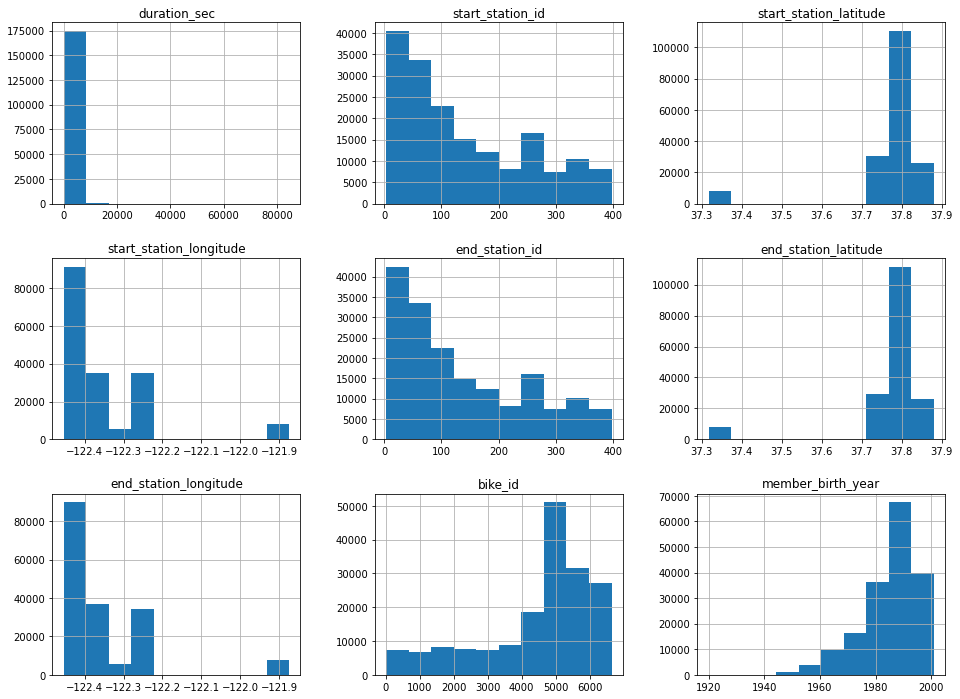

In [19]:
# Pandas .hist() for exploratory Histogram matrix of the Numeric variables.
gobike_clean.hist(figsize=[16, 12]);    # REM: Only numeric variables and 10 bins by default with Pandas .hist() .

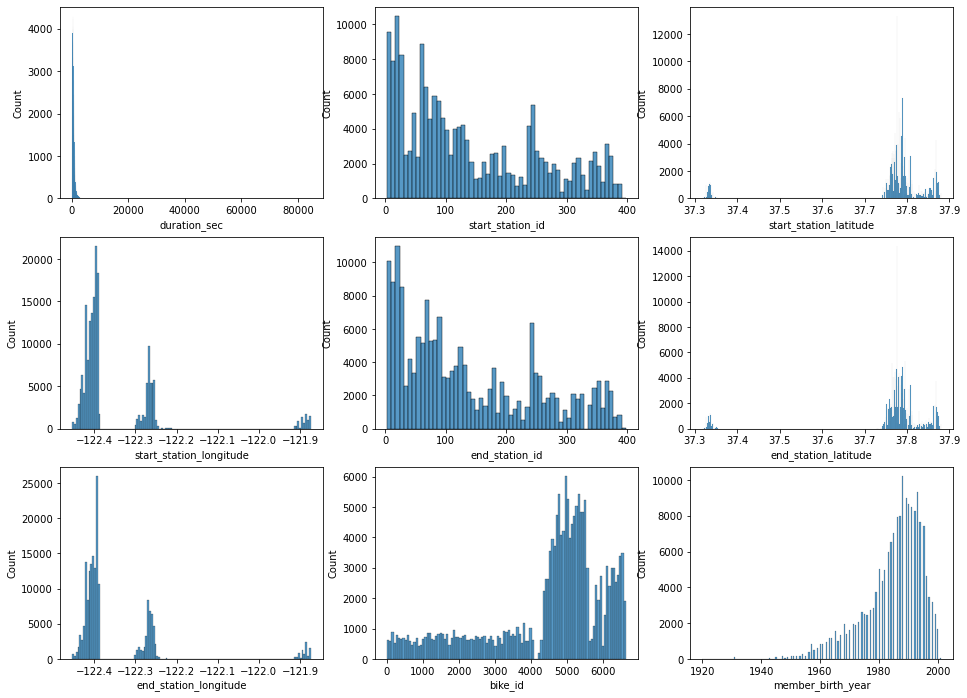

In [20]:
# Because sb.histplot() tends to automatically generate a more helpful bin size, set up a comparable matrix
# of univariate Seaborn .histplot() plots.

numeric_vars = ['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 
               'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year']
# NOTE: Could programmatically generate a 'numeric_vars' list from an assigned gobike_clean.info() DataFrame.

fig, axs = plt.subplots(3, 3, figsize=[16, 12])    # 3 Rows (nrows= ) x 3 Columns (ncols= ).
axs = axs.flatten()    # For axs 0 through 8 indexing, rather than 2D indexing, if I understand correctly.

i = 0
for var in numeric_vars:

    sb.histplot(gobike_clean[var], ax=axs[i], kde=False)    # Plot the current 'var' column of numeric_vars.
    i += 1

#### OBSERVATIONS:
- One or more extremely long (~80000 sec) bike ride times; see Row1, Column1 (i.e., R1,C1).
- Wide range of the number of bike rides (corresponding to "Count" values) starting and ending across the ~400 stations, with a given station appearing to often underperform or overperform in parallel with respect to being a start or end station; see R1,C2 and R2,C2.
- A small group of stations at a latitude of between 37.3 to 37.4 degrees; see R1,C3 or R2,C3. From the information about the Ford Go Bike system (above weblink), a geographic map, and a latitude and longitude finder (www.latlong.net), it appears that this small group of stations likely includes the bike-share stations in San Jose, rather than in the greater San Francisco area.
- Similarly, a small group of stations at a longitude around -121.9 degrees (see R2,C1 and R3,C1), although the higher count values compared to the small "latitude" group suggests that there are also some San Francisco area stations that are further east.
- Interesting distribution of the number of bike rides taken on each bike of the bike-sharing system (i.e., R3,C2). From the somewhat limited information I could find about the Ford Go Bike system (see above "Introduction"), I suspect that at least some of the higher-bike_id bikes are electric "Plus" ebikes. Also, the bike-sharing system may have been adjusted to have fewer total bikes (being ridden more often) for bikes with bike_id's greater than 4000.
- The `member_birth_year` distribution, not unexpectedly, is somewhat left-skewed.

### Bike ride duration (duration_sec) -- outcome variable: 

In [21]:
# Because I am interested in factors contributing to moderately long ride times, and because some of the 
# very long ride times (80000 sec, ~ 22.2 hours) are probably NOT relevant to this (and possibly NOT valid),
# I will check more closely on the distribution of 'duration_sec' without the very long duration rides.

# First, check the number of bike rides with a 'duration_sec' value greater than a handful of select values   
# (compare to above .describe() quartile output, as well).
duration = [30000, 10000, 3000, 1000, 300]

for time in duration:
    print('Number of bike rides longer than {} seconds: {}'.format(time, gobike_clean.query('duration_sec > @time').shape[0]))

Number of bike rides longer than 30000 seconds: 125
Number of bike rides longer than 10000 seconds: 358
Number of bike rides longer than 3000 seconds: 1924
Number of bike rides longer than 1000 seconds: 25531
Number of bike rides longer than 300 seconds: 136730


Number of bike rides <= 9600 seconds: 174504


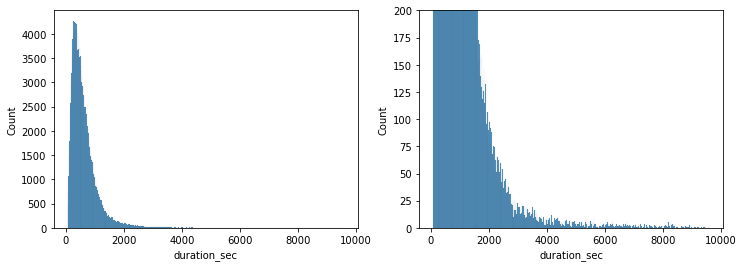

In [22]:
# So I will FILTER OUT the relatively few (~358) "very long" duration bike rides and just consider the 
# distribution of bike rides with 'duration_sec' <= 9600 sec (160 min).
gobike_clean = gobike_clean.query('duration_sec <= 9600')
print('Number of bike rides <= 9600 seconds: {}'.format(gobike_clean.shape[0]))

# Histograms of 'duration_sec' values, now with only values <= 9600 sec.
fig = plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
sb.histplot(gobike_clean['duration_sec'], kde=False) 

plt.subplot(1, 2, 2)
sb.histplot(gobike_clean['duration_sec'], kde=False)
plt.ylim(0, 200);

# NOTE: A right-skewed distribution of bike ride durations, with no apparent peaks for rides >2000 seconds.

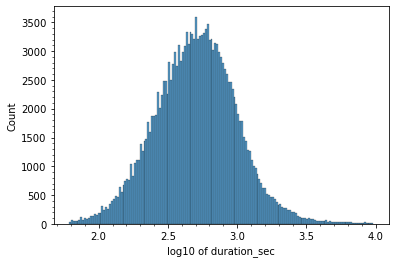

In [23]:
# Using sb.histplot() and log10-transformed 'duration_sec' data.
sb.histplot(np.log10(gobike_clean['duration_sec']), kde=False)
plt.minorticks_on()
plt.xlabel('log10 of duration_sec');

# NOTE: No notable bimodality (or greater modality) relative to possibly choosing a cutoff for "moderately long" bike rides.
#
# CONSIDER: So, graphically one might consider log10(duration_sec) of 2.90 to 3.65 to be "moderately long" bike rides 
#    and 2.00 to 2.50 for a comparable number of "moderately short" bike rides.  More practically, thinking about the 
#    bike ride time in minutes relative to the approximate mode (10^2.7 = 501 sec) or median (above, 514 sec) of about 
#    8.5 minutes, I would consider moderately long bike rides to be in the 12 min (720 sec ~ 10^2.857) to 10^3.65 sec 
#    (4466 sec ~ 74 min) range and moderately short bike rides to be in the 3 min (180 sec ~ 10^2.255) to 7 min 
#    (420 sec ~ 10^2.623).
#
#    Thus, I may want to analyze "moderately long" bike rides (780 sec to 4466 sec) in comparison to 
#    "moderately short" bike rides (180 sec to 420 sec).  Could add vertical red lines to the plot for 
#    "moderately short" and "moderately long" ranges if I choose to pursue this type of analysis.

In [24]:
# For upcoming bivariate explorations, add a column of log10-transformed 'duration_sec' data 
# to the 'gobike_clean' DataFrame.
gobike_clean['log10_duration'] = np.log10(gobike_clean['duration_sec'])

# Checking current 'gobike_clean' DataFrame.
print(gobike_clean.info())
gobike_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174504 entries, 4 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174504 non-null  int64         
 1   start_time               174504 non-null  datetime64[ns]
 2   end_time                 174504 non-null  datetime64[ns]
 3   start_station_id         174504 non-null  float64       
 4   start_station_name       174504 non-null  object        
 5   start_station_latitude   174504 non-null  float64       
 6   start_station_longitude  174504 non-null  float64       
 7   end_station_id           174504 non-null  float64       
 8   end_station_name         174504 non-null  object        
 9   end_station_latitude     174504 non-null  float64       
 10  end_station_longitude    174504 non-null  float64       
 11  bike_id                  174504 non-null  int64         
 12  user_type       

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
4             37.792714            -122.248780     4898  Subscriber   
5             37.798014            -122.405950     5200  Subscriber   
6             37.329732            -121.901782     3803  Subscriber   
7             37.756708            -122.421025     6329  Subscriber   
8             37.756708            -122.421025     6548  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  log10_duration  
4             1974.0          Male                     Yes        3.200029  
5             1959.0          Male                      No        3.253580  
6             1983.0        Female                      No        3.059563  
7             1989.0          Male                      No        3.208173  
8             1988.0         Other                      No        3.195900

**NOTE:** At this point, 
- I have both the starting `gobike_df` and a working `gobike_clean` DataFrame.
- I next want to consider my six "predictor" variables, i.e., (a) - (f) above.

### Bike ride start time (start_time) -- predictor variable 'a':

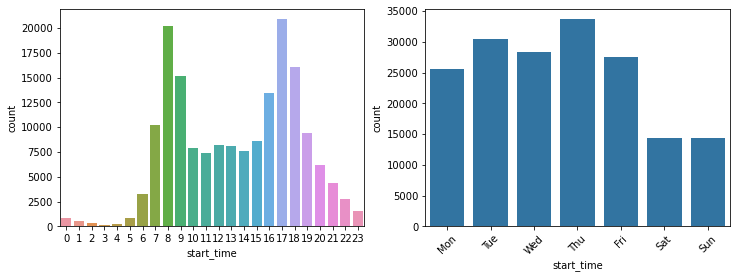

In [25]:
# Bike ride frequency across each hour of the day and each day of the week.

color_0 = sb.color_palette()[0]

fig = plt.figure(figsize=[12, 4])

# Left subplot.
plt.subplot(1, 2, 1)
sb.countplot(x=gobike_clean.start_time.dt.hour)

# Right subplot.
plt.subplot(1, 2, 2)
sb.countplot(x=gobike_clean.start_time.dt.weekday, color=color_0);    # Monday = 0, Sunday = 6
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45);

**OBSERVATIONS:** 
- As I suspected, the number of bike ride start times peaks around a standard workday's start time (~ 8 am) and end time (~ 5 pm)<br><br>
- Interestingly, the number of bike rides is consistently greater on the week days (Mon - Fri).

### Linear distance between start station and end station (lin_distance) -- predictor variable 'b':

In [26]:
# Define a function to calculate the linear distance between a start station and a end station using the Haversine formula.
# NOTE: Output in kilometers.

# REFERENCES:
# 1. https://stackoverflow.com/questions/34502254/vectorizing-haversine-distance-calculation-in-python
# 2. https://stackoverflow.com/questions/57294120/calculating-distance-between-latitude-and-longitude-in-python

'''
Purpose: Calculate the linear distance in kilometers between two points of latitude and longitude using the Haversine formula.

lat1:  Accepts the latitude value for the first of two points (e.g., 'start_station_latitude' value).
lon1:  Accepts the longitude value for the first of two points (e.g., 'start_station_longitude' value).
lat2:  Accepts the latitude value for the second of two points (e.g., 'end_station_latitude' value).
lon2:  Accepts the longitude value for the second of two points (e.g., 'end_station_longitude' value).

Returns: A single float value for the linear distance between the two points with units of kilometers.
'''

def haversine(lat1, lon1, lat2, lon2):
    earth_rad = 6371    # Kilometer units.
    
    lat_diff = np.radians(lat2 - lat1)
    lon_diff = np.radians(lon2 - lon1)
    
    a = (np.sin(lat_diff / 2.) * np.sin(lat_diff / 2.) +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) *
         np.sin(lon_diff / 2.) * np.sin(lon_diff / 2.))
    c = 2. * np.arctan2(np.sqrt(a), np.sqrt(1. - a))
    d = earth_rad * c
    return d    # in kilometers.

In [27]:
# Calculate the linear distance between the start station and end station for each bike ride.

# REFERENCE:  https://www.codeforests.com/2020/07/18/pass-multiple-columns-to-lambda/

# OPTION 1
# "...in the apply function, we have the parameter axis=1 to indicate that the x in the lambda represents a "row" of the  
# designated column values [and] we can UNPACK [UNZIP] the x with *x and pass it to the [function]."
lin_distance_1 = gobike_clean[['start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                          'end_station_longitude']].apply(lambda x: haversine(*x), axis=1)
lin_distance_1

# OPTION 2
lin_distance_2 = gobike_clean.apply(lambda x: haversine(x['start_station_latitude'], x['start_station_longitude'], 
                                                     x['end_station_latitude'], x['end_station_longitude']), axis=1)
lin_distance_2

# NOTE: Checked a couple of the below distances using www.calculator.net/distance-calculator.html,
#       and the respective below outputs are essentially equivalent.

4         2.409301
5         3.332203
6         2.028551
7         4.532568
8         4.532568
            ...   
183407    1.464766
183408    1.402716
183409    0.379066
183410    0.747282
183411    0.710395
Length: 174504, dtype: float64

In [28]:
# Add linear distances between the start station and end station (in km) to the 'gobike_clean' DataFrame.
gobike_clean['lin_distance'] = lin_distance_2

print(gobike_clean.info())
gobike_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174504 entries, 4 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174504 non-null  int64         
 1   start_time               174504 non-null  datetime64[ns]
 2   end_time                 174504 non-null  datetime64[ns]
 3   start_station_id         174504 non-null  float64       
 4   start_station_name       174504 non-null  object        
 5   start_station_latitude   174504 non-null  float64       
 6   start_station_longitude  174504 non-null  float64       
 7   end_station_id           174504 non-null  float64       
 8   end_station_name         174504 non-null  object        
 9   end_station_latitude     174504 non-null  float64       
 10  end_station_longitude    174504 non-null  float64       
 11  bike_id                  174504 non-null  int64         
 12  user_type       

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
4             37.792714            -122.248780     4898  Subscriber   
5             37.798014            -122.405950     5200  Subscriber   
6             37.329732            -121.901782     3803  Subscriber   
7             37.756708            -122.421025     6329  Subscriber   
8             37.756708            -122.421025     6548  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  log10_duration  \
4             1974.0          Male                     Yes        3.200029   
5             1959.0          Male                      No        3.253580   
6             1983.0        Female                      No        3.059563   
7             1989.0          Male                      No        3.208173   
8             1988.0         Other                      No        3.195900   

   lin_distance  
4      2.409301  
5      3.332203  
6      2.028551  
7      4.532568  
8      4.532568

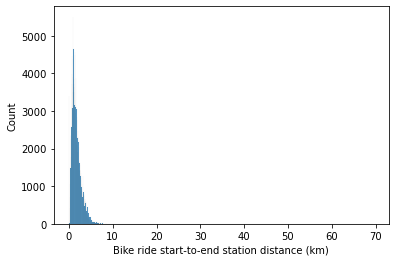

In [29]:
# Histogram of the bike ride start-to-end station distances.
sb.histplot(data=gobike_clean, x='lin_distance')
plt.xlabel('Bike ride start-to-end station distance (km)');

# NOTE: Why is the x-axis distance out to 70 km eventhough the latitude and longitude min and max values appeared reasonable?

In [30]:
# Check for bike ride start-to-end station distances greater than 10 km.
lin_dist_over10 = gobike_clean.query('lin_distance > 10')
lin_dist_over10

# NOTE: Notice the one extreme lin_distance value of ~69.5 km.

duration_sec              start_time                end_time  \
19827           2229 2019-02-26 15:11:44.523 2019-02-26 15:48:54.373   
50859           3225 2019-02-21 17:51:18.986 2019-02-21 18:45:04.085   
85529           8957 2019-02-17 12:38:50.477 2019-02-17 15:08:08.352   
87602           4378 2019-02-17 00:27:13.613 2019-02-17 01:40:11.883   
89787           1800 2019-02-16 14:15:06.336 2019-02-16 14:45:06.488   
112038          6945 2019-02-12 14:28:44.402 2019-02-12 16:24:30.158   
121514          1792 2019-02-11 14:39:16.299 2019-02-11 15:09:09.130   
153112          2216 2019-02-06 13:05:00.691 2019-02-06 13:41:57.678   
161775          2357 2019-02-05 13:14:18.246 2019-02-05 13:53:35.665   

        start_station_id                                start_station_name  \
19827              227.0                    Foothill Blvd at Fruitvale Ave   
50859              167.0                        College Ave at Harwood Ave   
85529              163.0                         Lake Merritt BART Station   
87602                9.0                            Broadway at Battery St   
89787              201.0                              10th St at Fallon St   
112038              21.0  Montgomery St BART Station (Market St at 2nd St)   
121514             230.0                           14th St at Mandela Pkwy   
153112             219.0                             Marston Campbell Park   
161775             201.0                              10th St at Fallon St   

        start_station_latitude  start_station_longitude  end_station_id  \
19827                37.783757              -122.222603            21.0   
50859                37.848152              -122.252160            22.0   
85529                37.797320              -122.265320             8.0   
87602                37.798572              -122.400869           193.0   
89787                37.797673              -122.262997            15.0   
112038               37.789625              -122.400811           300.0   
121514               37.810743              -122.291415           223.0   
153112               37.809824              -122.280192           134.0   
161775               37.797673              -122.262997            15.0   

                                         end_station_name  \
19827    Montgomery St BART Station (Market St at 2nd St)   
50859                               Howard St at Beale St   
85529                       The Embarcadero at Vallejo St   
87602                        Grand Ave at Santa Clara Ave   
89787   San Francisco Ferry Building (Harry Bridges Pl...   
112038                               Palm St at Willow St   
121514                     16th St Mission BART Station 2   
153112                             Valencia St at 24th St   
161775  San Francisco Ferry Building (Harry Bridges Pl...   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
19827              37.789625            -122.400811     2080  Subscriber   
50859              37.789756            -122.394643     4567  Subscriber   
85529              37.799953            -122.398525     4874  Subscriber   
87602              37.812744            -122.247215     1975    Customer   
89787              37.795392            -122.394203     6396  Subscriber   
112038             37.317298            -121.884995     4780  Subscriber   
121514             37.764765            -122.420091      855  Subscriber   
153112             37.752428            -122.420628     3027  Subscriber   
161775             37.795392            -122.394203     4530  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  \
19827              1989.0          Male                     Yes   
50859              1988.0         Other                     Yes   
85529              1975.0          Male                     Yes   
87602              1993.0          Male                      No   
89787              1975.0          Male         

**NOTE:** Via internet searches, there is an intersection of Palm Street and Willow Street in San Jose, CA, and the distance between San Francisco and San Jose is roughly 77 km. Therefore, I strongly suspect that the ~69.5 km bike ride was from a
San Francisco area station to a San Jose station.

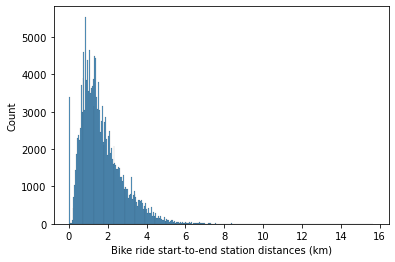

In [31]:
# Drop the one extreme row (index 112038, ~69.5 km between start and end station).

# REM: Verify that row w/ "row index" 112038 is deleted and NOT just the 112038th row, 
#      which will have a different row index value because of prior row drops!

# PERMANENTLY drop the index 112038 row associated with ~69.5 km lin_distance.
gobike_clean.drop(112038, axis=0, inplace=True)

sb.histplot(data=gobike_clean, x='lin_distance')
plt.xlabel('Bike ride start-to-end station distances (km)');

# NOTE: Notice the peak at 0 km (i.e., the bike rides w/ the same start and end station), and x-axis no longer out to 70 km.

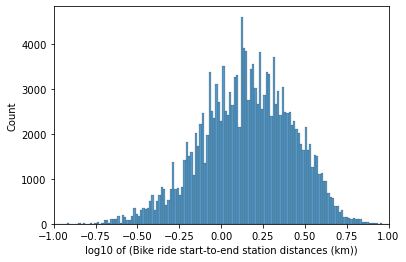

In [32]:
# Checking the Histogram of log10 transformed 'lin_distance_2' values WITHOUT THE 0 VALUES.
sb.histplot(x=np.log10(gobike_clean.query('lin_distance > 0')['lin_distance']))
            
plt.xlabel('log10 of (Bike ride start-to-end station distances (km))')

# Check with a smaller x-axis range.
plt.xlim(-1, 1);    # Consider 0.1, 0.3, 1, 3, 10 for non-log10 transformed values.

# NOTE: Fairly symmetric, unimodal distribution of nonzero start-to-end station ride distances.

In [33]:
# Exactly how many start-to-end station distances are 0.0 (i.e., start and end at the same station)?
lin_dist0 = gobike_clean.query('lin_distance == 0')

print(len(lin_dist0))
lin_dist0

# NOTE: Interestingly, relatively few bike rides (3393/174503 = 0.194; i.e., about 2%) 
#       start and end at the same station.

# CONSIDER:  May want to separately use the "0 km distance" 'duration_sec' data for comparison to the rest of the data.

3393


duration_sec              start_time                end_time  \
19               874 2019-02-28 23:43:05.183 2019-02-28 23:57:39.796   
27               408 2019-02-28 23:48:08.282 2019-02-28 23:54:56.930   
34               471 2019-02-28 23:42:43.361 2019-02-28 23:50:34.446   
55              3478 2019-02-28 22:39:35.020 2019-02-28 23:37:33.342   
56              3140 2019-02-28 22:44:53.503 2019-02-28 23:37:14.090   
...              ...                     ...                     ...   
183317          1476 2019-02-01 02:45:04.744 2019-02-01 03:09:41.184   
183318           877 2019-02-01 02:53:15.995 2019-02-01 03:07:53.058   
183326          5713 2019-02-01 01:02:55.168 2019-02-01 02:38:09.002   
183350           874 2019-02-01 01:41:43.414 2019-02-01 01:56:17.552   
183380           943 2019-02-01 00:43:11.550 2019-02-01 00:58:55.217   

        start_station_id           start_station_name  start_station_latitude  \
19                 180.0     Telegraph Ave at 23rd St               37.812678   
27                  78.0          Folsom St at 9th St               37.773717   
34                 133.0       Valencia St at 22nd St               37.755213   
55                  11.0       Davis St at Jackson St               37.797280   
56                  11.0       Davis St at Jackson St               37.797280   
...                  ...                          ...                     ...   
183317             345.0        Hubbell St at 16th St               37.766483   
183318             385.0  Woolsey St at Sacramento St               37.850578   
183326              31.0   Raymond Kimbell Playground               37.783813   
183350             253.0      Haste St at College Ave               37.866418   
183380              31.0   Raymond Kimbell Playground               37.783813   

        start_station_longitude  end_station_id             end_station_name  \
19                  -122.268773           180.0     Telegraph Ave at 23rd St   
27                  -122.411647            78.0          Folsom St at 9th St   
34                  -122.420975           133.0       Valencia St at 22nd St   
55                  -122.398436            11.0       Davis St at Jackson St   
56                  -122.398436            11.0       Davis St at Jackson St   
...                         ...             ...                          ...   
183317              -122.398279           345.0        Hubbell St at 16th St   
183318              -122.278175           385.0  Woolsey St at Sacramento St   
183326              -122.434559            31.0   Raymond Kimbell Playground   
183350              -122.253799           253.0      Haste St at College Ave   
183380              -122.434559            31.0   Raymond Kimbell Playground   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
19                 37.812678            -122.268773     5629    Customer   
27                 37.773717            -122.411647     5410  Subscriber   
34                 37.755213            -122.420975     5559  Subscriber   
55                 37.797280            -122.398436     1846  Subscriber   
56                 37.797280            -122.398436     3040  Subscriber   
...                      ...                    ...      ...         ...   
183317             37.766483            -122.398279     5224  Subscriber   
183318             37.850578            -122.278175     4913  Subscriber   
183326             37.783813            -122.434559     5366  Subscriber   
183350             37.866418            -122.253799     3232  Subscriber   
183380             37.783813            -122.434559     5343  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  \
19                 1978.0          Male                      No   
27                 1982.0          Male                      No   
34                 1992.0          Male                      No   
55                 1995.0   

**OBSERVATIONS:**  
- After dropping the one particularly long start-to-end station linear distance ride from `gobike_clean` DataFrame, the majority of bike ride start-to-end station linear distances form a right-skewed Histogram.<br><br>
- There is also a small subset of 3393 "zero linear distance" bike rides (i.e., rides that start and end at the same station).

### Bike id (bike_id) -- predictor variable 'c':
  **Remember:** Considering bike id with respect to possible newer electric "Plus" ebikes and longer bike rides.

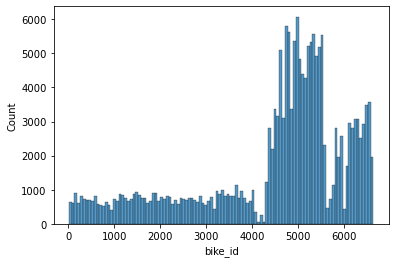

In [34]:
# Number of bike rides for each bike (identified by bike_id).
sb.histplot(gobike_df.bike_id);

In [35]:
# Check the number of unique bike_id values.
gobike_clean.bike_id.nunique()

# NOTE: Notably fewer bike ids than the preceding plot's range of approximately 1 to 6500.

4606

In [36]:
# Identify any substantial gaps in bike_id values for possible distinction between groups of "older" non-electric bikes
# and "newer" ebikes.

# Actual range of bike ids in the current 'gobike_clean' DataFrame.
print(gobike_clean.bike_id.min(), gobike_clean.bike_id.max(), '\n')

# Set of all possible bike ids within the actual observed range of bike ids.
all_ids = set(np.arange(gobike_clean.bike_id.min(), gobike_clean.bike_id.max(), 1))

# Set of all bike ids actually within the current 'gobike_clean' DataFrame.
gobike_ids = set(gobike_clean.bike_id.unique())

# Number of missing bike ids within the actual range of bike ids.
missing_bike_ids = list(all_ids.difference(gobike_ids))
print(len(missing_bike_ids), '\n')

# Missing bike_id gaps of 10 or more consecutive values: 
gap_size = 10
gap_list = []
count = 0

for i in range(0, len(missing_bike_ids) - 1, 1):
    
    if missing_bike_ids[i+1] - missing_bike_ids[i] == 1:
        gap_list.append(missing_bike_ids[i])
        count += 1
    elif count >= gap_size:
        print(gap_list, '\n')
        gap_list = []
        count = 0
    else:
        gap_list = []
        count = 0        

11 6645 

2029 

[940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950] 

[3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769] 

[3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879] 

[3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978] 

[4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 418

**OBSERVATIONS:**
- A substantial gap in bike_id's appears to only occur in the 4070 to 4313 range, although there are about 20 bike_id's within this range as well.<br><br>
- Perhaps the higher bike_id bikes (> 4313) contain the newer electric "Plus" ebikes or at least a new group(s) of bikes put into service.

### User type (user_type) -- predictor variable 'd':

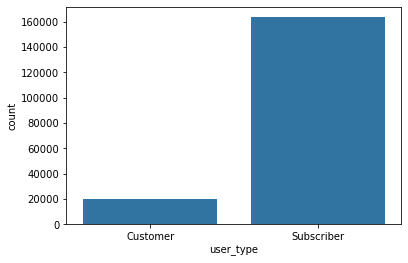

In [37]:
# sb.countplot() of bike rider user type (essentially plotting corresponding .value_counts() data).
color_0 = sb.color_palette()[0]

sb.countplot(data=gobike_df, x='user_type', color=color_0);

# NOTE: Approximately 8 times more "Subscriber" than "Customer" bike riders.

### Rider age (rider_age) -- predictor variable 'e':

In [38]:
# Generate a 'rider_age' column from the 'member_birth_year' column.
current_yr = 2019

gobike_clean['rider_age'] = current_yr - gobike_df.member_birth_year

print(gobike_clean.info())
gobike_clean.head()

# NOTE: Age values look correct (I checked first two values).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174503 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174503 non-null  int64         
 1   start_time               174503 non-null  datetime64[ns]
 2   end_time                 174503 non-null  datetime64[ns]
 3   start_station_id         174503 non-null  float64       
 4   start_station_name       174503 non-null  object        
 5   start_station_latitude   174503 non-null  float64       
 6   start_station_longitude  174503 non-null  float64       
 7   end_station_id           174503 non-null  float64       
 8   end_station_name         174503 non-null  object        
 9   end_station_latitude     174503 non-null  float64       
 10  end_station_longitude    174503 non-null  float64       
 11  bike_id                  174503 non-null  int64         
 12  user_type       

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
4             37.792714            -122.248780     4898  Subscriber   
5             37.798014            -122.405950     5200  Subscriber   
6             37.329732            -121.901782     3803  Subscriber   
7             37.756708            -122.421025     6329  Subscriber   
8             37.756708            -122.421025     6548  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  log10_duration  \
4             1974.0          Male                     Yes        3.200029   
5             1959.0          Male                      No        3.253580   
6             1983.0        Female                      No        3.059563   
7             1989.0          Male                      No        3.208173   
8             1988.0         Other                      No        3.195900   

   lin_distance  rider_age  
4      2.409301       45.0  
5      3.332203       60.0  
6      2.028551       36.0  
7      4.532568       30.0  
8      4.532568       31.0

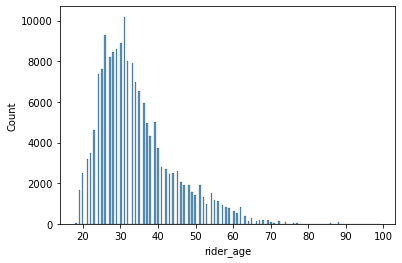

In [39]:
# Histogram of discrete numeric rider age values.
sb.histplot(gobike_clean.rider_age);

# NOTE: Somewhat right-skewed distribution, but generally as one might expect. Although, the number of
#       bike rides for those in their early 20s is notably less than for those in their later 20s.

### Rider gender (member_gender) -- predictor variable ' f ':

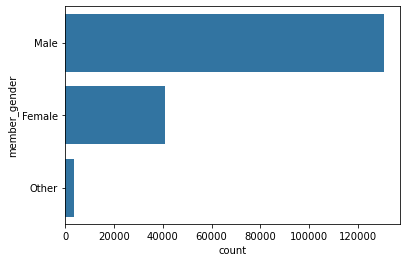

In [40]:
# Horizontal bar plot of gender counts.
gender_order = ['Male', 'Female', 'Other']
sb.countplot(data=gobike_df, y='member_gender', order=gender_order, color=color_0);    # See 'color_0' above. 

# NOTE: Males represent a substantial majority of riders.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The `duration_sec` "outcome" variable values formed a right-skewed histogram and extended out to an unexpected high 80000+ seconds (i.e., over 22 hours).  Given my interest in contributing factors to common and longer bike rides, I choose to filter out the 376 bike rides over 9600 sec (160 min) in duration.  Because the filtered `duration_sec` data still showed a right-skewed distribution, I performed a log10 transformation and replotted the `log10_duration` data.  This log10 transformed data showed a fairly symmetric unimodal distribution centered near 510 sec (8.5 min).  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The "predictor" variables that I considered were (a) start time, (b) linear distance between start and end station, (c) bike id, (d) user type, (e) rider age, and (f) rider gender.<br>
  With regard to start time, both the starting hour and day of the week for each ride were "extracted" from the `start_time` data and plotted as histograms. Interestingly, the number of bike rides (i.e., "Count") for the starting hour showed a distribution with peaks at 8 am and 5 pm (hour 17), while the number of bike rides on the weekend days (Sat. and Sun.) were about half of that on week days (Mon. through Fri.). A column for start hour (`start_time_hr`) and for day of the week (`start_time_dotw`) is added to my working `gobike_clean` DataFrame in the next Code Cell below to assist with their use in Bivariate Exploration.<br> 
  Linear distance between each bike ride's start and end station was generated and added as a new column (`lin_distance`) to my working `gobike_clean` DataFrame to consolidate four separate latitude and longitude values into a single value. One particularly long linear distance (~69.5 km; likely for a San Francisco area start station to a San Jose end station) was identified via an initial histogram and the associated row was dropped because of my interest in moderately long duration bike rides. The replotted histogram showed a discrete peak at a linear distance of zero (i.e., the same start and end station) along with a right-skewed distribution for the remaining "nonzero" bike ride linear distances. A histogram of log10-transformed, nonzero linear distance data showed a fairly symmetric unimodal distribution.<br> 
  At least two groupings of `bike_id` values showed notably different levels of bike ride count. While relatively large gaps in bike ids were identified to determine possible meaningful breaks in bike ids (e.g., separations between older bikes and newer "Plus" ebikes), no adjustments to `bike_id` data were performed.<br>
  The binary `user_type` variable showed an approximately 8 times greater number of "Subscribers" than "Customers". No adjustments were made to this data.<br> 
  Because a person's age is more immediately comprehensible than a person's birth year with respect to this bike ride data, the `member_birth_year` column was used to generate a new `rider_age` column. The histogram distribution of bike ride count across rider ages appeared as one might expect, with a particularly elevated count for ages 25 to 36 y/o. No additional adjustments were made to this data.<br>
  Finally, the trinary `member_gender` variable showed about 10 times fewer bike rides by Other members than Female members and 3 times fewer bike rides by Female members than Male members. No adjustments were made to this data.

<a id='Bivariate'></a>
## IV. Bivariate Exploration

  **Remember:** Scatterplots for Numeric vs. Numeric variable values, Violin(or Swarm) or Box plots for Numeric vs. Categoric variable values, and Clustered Bar plots or HeatMaps for Categoric vs. Categoric variable values (with respect to Frequency/Count) are the most common approaches for Bivariate Exploration.  Correlation matrix (df.coor() within heatmap) and PairGrid matrix are also useful. (my "DataVisualization2021_06_08.docx" notes)

In [41]:
# Add the starting hour and starting day of the week categoric (eventhough numeric) variables of interest; 
# REM: Mon = 0 to Sun = 6 for day of the week data.
gobike_clean['start_time_hr'] = gobike_clean.start_time.dt.hour
gobike_clean['start_time_dotw'] = gobike_clean.start_time.dt.weekday

# Numeric variables of interest.
numeric_vars = ['duration_sec', 'log10_duration', 'start_time_hr', 'start_time_dotw', 'lin_distance', 'bike_id', 'rider_age']

# Categoric variables of interest.
categoric_vars = ['user_type', 'member_gender']

# Check my current working 'gobike_clean' DataFrame.
print(gobike_clean.info())
gobike_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174503 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174503 non-null  int64         
 1   start_time               174503 non-null  datetime64[ns]
 2   end_time                 174503 non-null  datetime64[ns]
 3   start_station_id         174503 non-null  float64       
 4   start_station_name       174503 non-null  object        
 5   start_station_latitude   174503 non-null  float64       
 6   start_station_longitude  174503 non-null  float64       
 7   end_station_id           174503 non-null  float64       
 8   end_station_name         174503 non-null  object        
 9   end_station_latitude     174503 non-null  float64       
 10  end_station_longitude    174503 non-null  float64       
 11  bike_id                  174503 non-null  int64         
 12  user_type       

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  ...  bike_id   user_type member_birth_year  \
4             37.792714  ...     4898  Subscriber            1974.0   
5             37.798014  ...     5200  Subscriber            1959.0   
6             37.329732  ...     3803  Subscriber            1983.0   
7             37.756708  ...     6329  Subscriber            1989.0   
8             37.756708  ...     6548  Subscriber            1988.0   

   member_gender bike_share_for_all_trip log10_duration  lin_distance  \
4           Male                     Yes       3.200029      2.409301   
5           Male                      No       3.253580      3.332203   
6         Female                      No       3.059563      2.028551   
7           Male                      No       3.208173      4.532568   
8          Other                      No       3.195900      4.532568   

   rider_age  start_time_hr  start_time_dotw  
4       45.0             23                3  
5       60.0             23                3  
6       36.0             23                3  
7       30.0             23                3  
8       31.0             23                3  

[5 rows x 21 columns]

### Overview of Bivariate Relationships:

17450


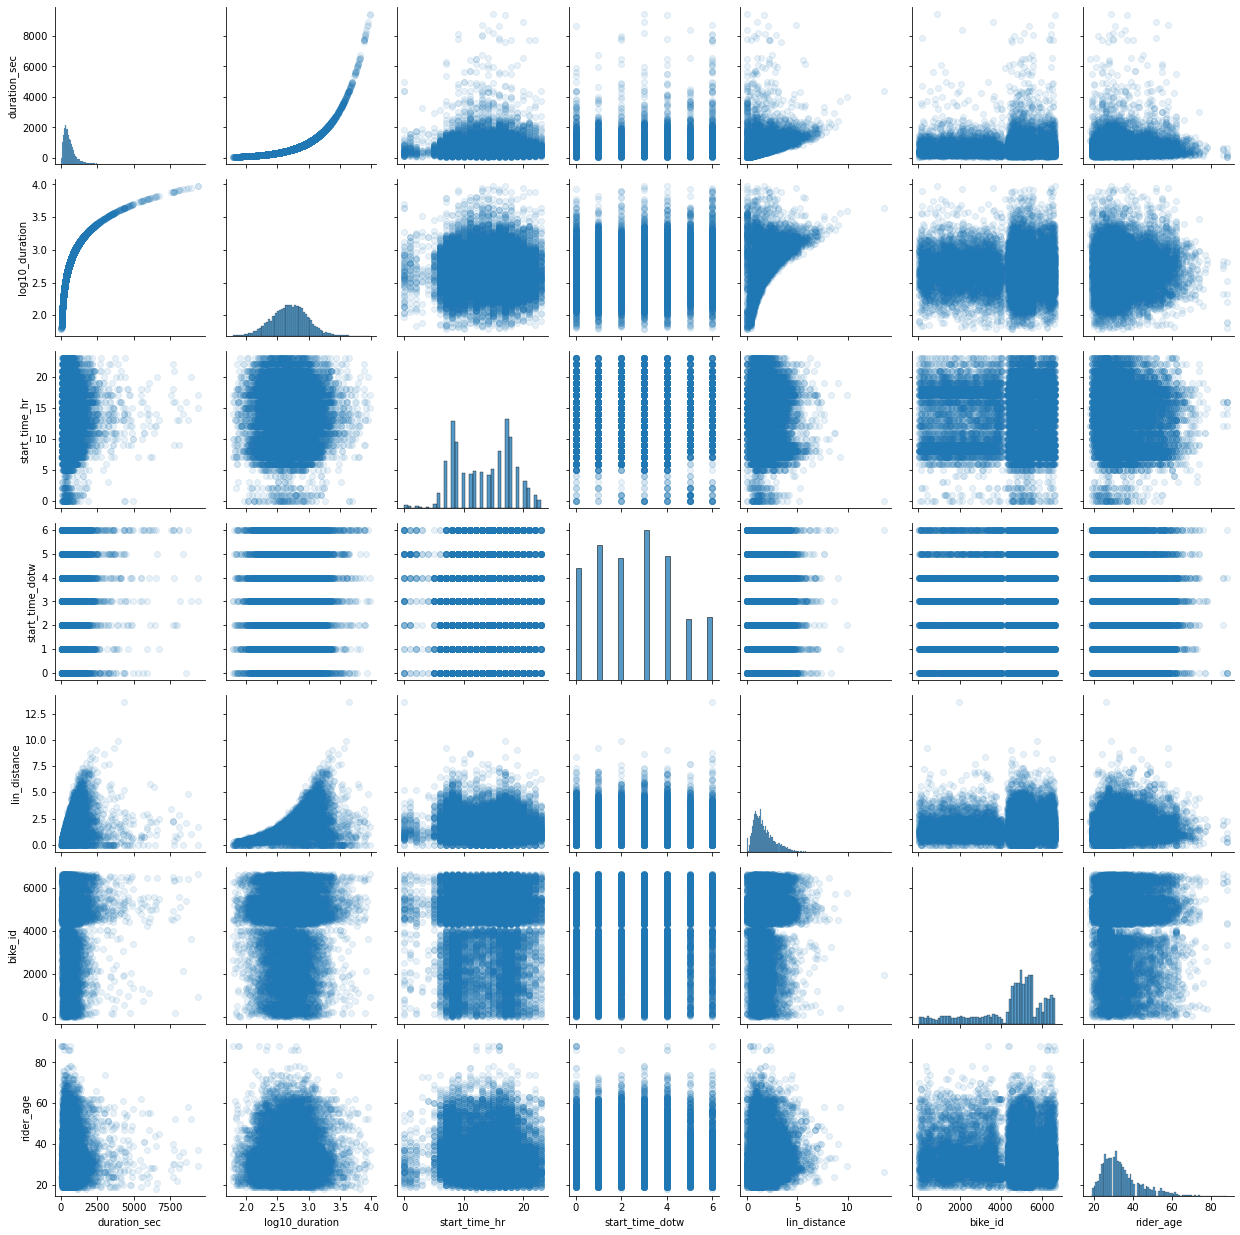

In [42]:
# Initial view of numeric vs. numeric bivariate relationships via sb.PairGrid() matrix.
# REM: Plot time increases rapidly with number of points (i.e., DataFrame rows), therefore, using a 10%-sized sample.
gobike_clean_subset = gobike_clean.sample(int(0.1 * gobike_clean.shape[0]))
print(len(gobike_clean_subset))

pg = sb.PairGrid(data=gobike_clean_subset, vars=numeric_vars)
pg.map_diag(sb.histplot)
pg.map_offdiag(plt.scatter, alpha=0.1);

**OBSERVATIONS:**
- **Considering bike ride duration (duration_sec or log10_duration) versus each of the other five numeric variables:**
    * duration vs. start_time_hr -- The early morning ride durations are usually quite short (<2000 sec), and eventhough the total number of rides peak around the 8 am and 5 pm "work commute" times, the majority of longer bike rides (>2000 sec) appear to occur between the work commute peak times, with some longer ride times around the evening work commute peak compared to the morning work commute.
    * duration vs. start_time_dotw (day-of-the-week) -- None of the week days (Mon - 0 through Sun - 6) have an obvious increase in the duration of bike rides; however, perhaps a slight increase on Sat, Sun, and Mon.
    * duration vs. lin_distance -- As anticipated, there is a minimum linear relationship between the distance from the start station to the end station and the ride duration. However, there also appears to be a tendency toward longer duration bike rides for those rides that start and end at the same station or at stations that are nearby each other.
    * duration vs. bike_id -- Again, a gap in bike_id's just above 4000 shows up; however, the notably greater number of bike rides for most of the higher-id bikes (i.e., >4300) and the consequent overplotting (even with a 10% sampling and alpha setting) obscure a visual assessment of an overall difference in average ride duration between the low-id and high-id bikes. 
    * duration vs. rider_age -- Interestingly, while bike ride duration appears to decrease some with increasing age, very short duration bike rides also appear to decrease with increasing age.<br><br>
- **Considering the bivariate relationships among the five non-duration numeric variables:**
    * start_time_hr vs. start_time_dotw (day-of-the-week) -- Again, a substantially greater number of bike rides occuring on Monday (0) through Friday (4) complicates interpretation; however, there does appear to be relatively fewer bike rides occurring at hour 2 to hour 4 on Mon. through Thu. and relatively more bike rides occurring at 0 (midnight to 1 am) and 1 am on Fri. through Sun.
    * start_time_hr vs. lin_distance -- This plot appears to mirror the univariate histogram for start_time_hr, therefore the overplotting at the "work commute" peak times, in particular (~8 am and ~5 pm), makes it difficult to tell if there is any relationship between a bike ride's start time and the linear distance between the start and end station.  
    * start_time_hr vs. bike_id -- Again, this plot's 2-dimensional distribution appears to solely reflect the differences in the number of bike rides across the univariate distributions.
    * start_time_hr vs. rider_age -- Same as that for the preceding pair.
    * start_time_dotw vs. lin_distance -- No apparent relationship.
    * start_time_dotw vs. bike_id -- No apparent relationship among the overplotting (even with a 10% sampling and alpha setting).
    * start_time_dotw vs. rider_age -- Same as that for the preceding pair, except there may be an indication that over 80 years of age riders prefer week day bike rides (Mon. through Fri.).
    * lin_distance vs. bike_id -- Again, this plot's 2-dimensional distribution appears to solely reflect the differences in the number of bike rides across the univariate distributions.
    * lin_distance vs. rider_age -- In general, this plot's 2-dimensional distribution also appears to reflect the differences in the number of bike rides across the univariate distributions.
    * bike_id vs. rider_age -- Again, this plot's 2-dimensional distribution appears to solely reflect the differences in the number of bike rides across the univariate distributions.

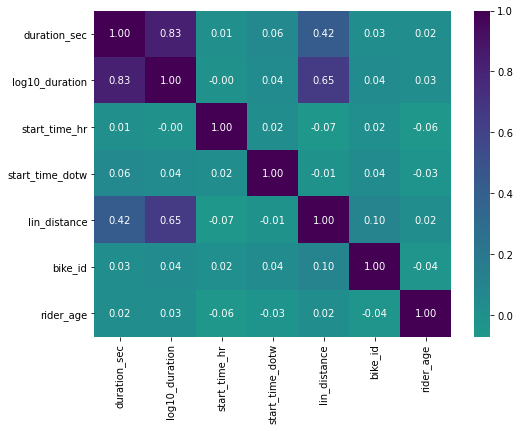

In [43]:
# (Linear) Correlation matrix for numeric bivariate relationships.
plt.figure(figsize=[8, 6])
sb.heatmap(gobike_clean[numeric_vars].corr(), annot=True, fmt='.2f', cmap='viridis_r', center=0);

# NOTE: As expected, linear distance between the start and end station did have a moderate positive correlation
#       with bike ride duration (i.e., longer distances between stations corresponded to longer bike ride times).
#       However, no other meaningful linear correlations are observed.

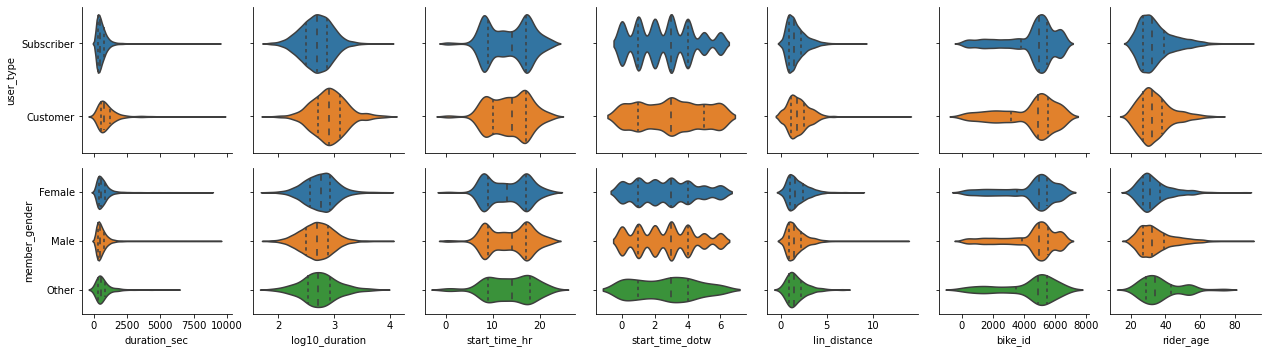

In [44]:
# Initial view of numeric vs. categoric bivariate relationships via sb.PairGrid() matrix.
pg = sb.PairGrid(data=gobike_clean_subset, y_vars=categoric_vars , x_vars=numeric_vars)
pg.map(sb.violinplot, inner='quartile');

#### OBSERVATIONS (from left to right on top and then on bottom row):
- "Customer" bike ride duration tends to be longer than that for "Subscriber" riders.
- Somewhat greater proportion of "Customer" riders bike between the peak "work commute" times of 8 am (hour 8) and 5 pm (hour 17).
- Apparently a more consistent number of "Customer" riders on each of the seven days of the week compared to "Subscriber" riders who notably favor "work week" days (Mon. through Fri.).
- Only slight differences between "Customer" and "Subscriber" riders with respect to linear distance between the start and end station, bike id, and rider age.
- Slight difference in bike ride duration relative to member gender.
- Only minor differences between the member genders with respect to the other five variables as well.

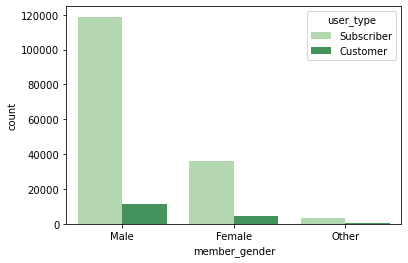

In [45]:
# Checking user_type vs. member_gender (categoric vs. categoric) relationship.
sb.countplot(data=gobike_clean, x='member_gender', hue='user_type', palette='Greens');

# NOTE: Roughly the same proportion of Subscribers to Customers for the three genders.

### Focus on Features Potentially Influencing Bike Ride Duration:
From the above, further consider the following relative to bike ride duration:<br>
 **1.** start_time_hr<br>
 **2.** start_time_dotw<br>
 **3.** Linear distance of zero (2%) and nonzero data groupings, including consideration of (a) the linear data grouping along and just "above" the<br>   minimum linear duration vs. lin_distance line and (b) the grouping of data points above and left of the linear data grouping.<br>
 **4.** "Low-bike_id" (<4070) and "high-bike_id" (>4313)<br>
 **5.** rider_age<br>
 **6.** user_type<br><br>
In addition, further consider:<br>
 **7.** user_type bike ride counts relative to start_time_hr and to start_time_dotw

#### 1. Duration vs. start time hour (start_time_hr)

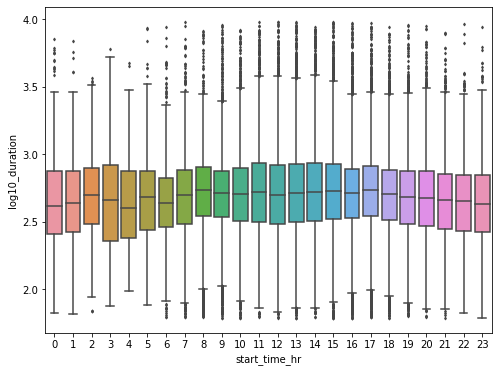

In [46]:
# Boxplots of log10_duration vs. start_time_hr.
plt.figure(figsize=[8, 6])
sb.boxplot(data=gobike_clean, x='start_time_hr', y='log10_duration', fliersize=2.0);
# NOTE: Could not find an appropriate "alpha" transparency parameter and argument for sb.boxplot().

# NOTE: Modestly higher MEDIAN duration (however, REM: log10 transformed y-axis values) during "work hours" (8 am to 5 pm).

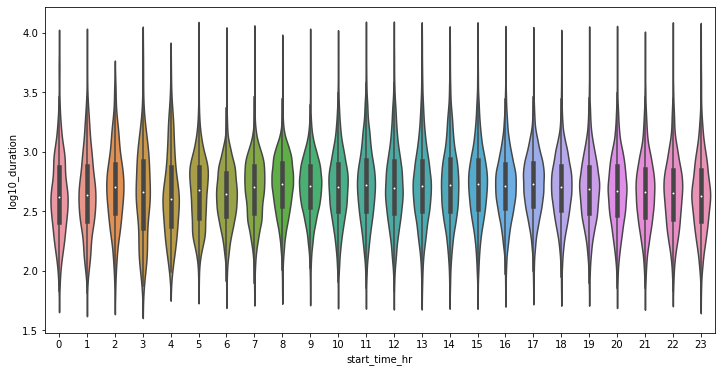

In [47]:
# Comparing Violinplots to the preceding Boxplots of log10_duration vs. start_time_hr.
plt.figure(figsize=[12, 6])
sb.violinplot(data=gobike_clean, x='start_time_hr', y='log10_duration');

# NOTE: Worse visually compared to preceding boxplots.

<AxesSubplot:xlabel='start_time_hr', ylabel='duration_sec'>

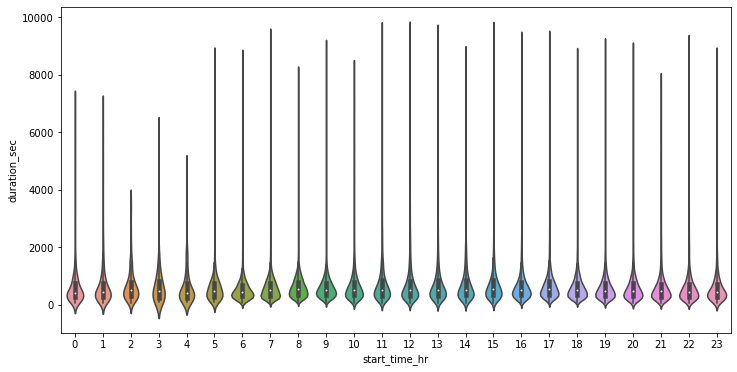

In [48]:
# Comparing nontransformed duration_sec vs. start_time_hr Violinplots to the preceding Violinplots.
plt.figure(figsize=[12, 6])
sb.violinplot(data=gobike_clean, x='start_time_hr', y='duration_sec')

# NOTE: Worse visually compared to preceding violinplots.

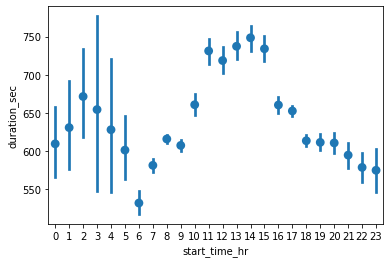

In [49]:
# Checking AVERAGE (nontransformed) duration times vs. start_time_hr.
plt.figure(figsize=[6, 4])
sb.pointplot(data=gobike_clean, x='start_time_hr', y='duration_sec', linestyles='');

**OBSERVATIONS:**
- A notably higher MEAN bike ride duration is seen from 11 am to 3 pm (hour 15) between the "peak work commute hours" of 8 am and 5 pm, and the MEDIAN bike ride duration also appeared to be elevated across the work hours (8 am to 5 pm). Also a possible peak in ride duration at 2 am (weekend bar closing time, perhaps?).<br><br>
- The particularly tight variability (error bars) around the 8 am and 5 pm (hour 17) points is likely consistent with numerous specific start to end station bike rides by work commuters at these two times.

#### 2. Duration vs. start time day-of-the-week (start_time_dotw)

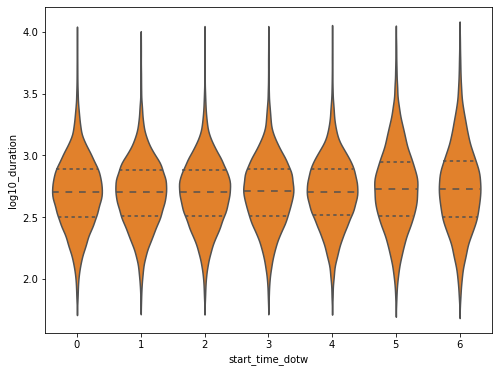

In [50]:
# Violinplot of transformed log10_duration vs. start_time_dotw.
color_1 = sb.color_palette()[1]
plt.figure(figsize=[8,6])
sb.violinplot(data=gobike_clean, x='start_time_dotw', y='log10_duration', inner='quartile', color=color_1);

# NOTE: Slightly elevated median and 3rd quartile on Saturday (5) and Sunday (6).

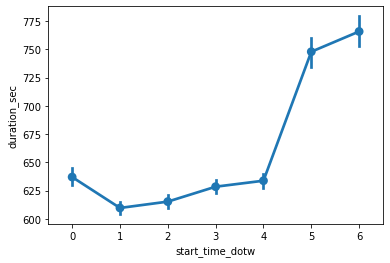

In [51]:
# Checking AVERAGE (nontransformed) duration times vs. start_time_dotw (Mon=0 through Sun=6).
sb.pointplot(data=gobike_clean, x='start_time_dotw', y='duration_sec');

# NOTE: Notably higher mean bike ride duration is seen for the weekend days, Saturday and Sunday.

#### 3. Duration vs. start to end station linear distance (lin_distance)

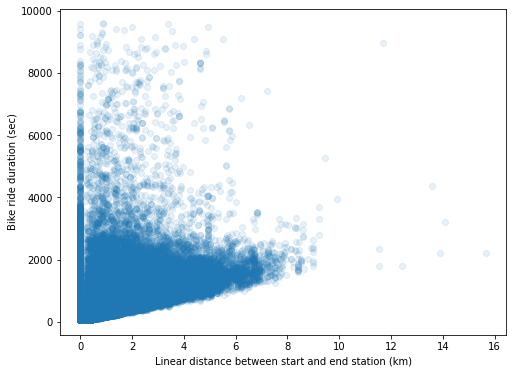

In [52]:
# Scatterplot of entire gobike_clean dataset.
plt.figure(figsize=[8, 6])

plt.scatter(data=gobike_clean, x='lin_distance', y='duration_sec', alpha=0.1)
plt.ylabel('Bike ride duration (sec)')
plt.xlabel('Linear distance between start and end station (km)');

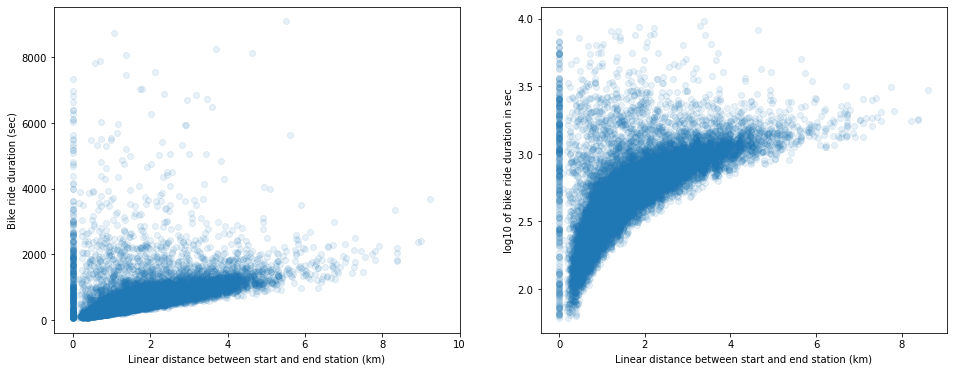

In [53]:
# Scatterplots of a 10% sample of the gobike_clean dataset of duration or log10 duration vs. linear distance.
plt.figure(figsize=[16, 6])

sample_size = int(0.1*gobike_clean.shape[0])

plt.subplot(1,2,1)
plt.scatter(data=gobike_clean.sample(sample_size), x='lin_distance', y='duration_sec', alpha=0.1)
plt.xlim(-0.5, 10)
plt.ylabel('Bike ride duration (sec)')
plt.xlabel('Linear distance between start and end station (km)')

plt.subplot(1,2,2)
plt.scatter(data=gobike_clean.sample(sample_size), x='lin_distance', y='log10_duration', alpha=0.1)
plt.ylabel('log10 of bike ride duration in sec')
plt.xlabel('Linear distance between start and end station (km)');

**OBSERVATIONS:**
- Interestingly, the substantial majority of nonzero-lin_distance bike rides appear to follow a "purposeful" linear relationship between bike ride duration and linear distance between start and station distance (typically less than ~8 km).<br><br>
- There is a smaller group of longer duration "recreational" bike rides that start and end at the same station or stations that are near one another (i.e., those points to the left of and above the nonzero, linear overplotted grouping).

#### 4. Duration vs. bike id (bike_id) 

In [54]:
# Check if grouping by 'bike_id', then mean of 'duration_sec' for each group, then barplot of the means 
# shows increased mean duration for the higher bike_id's (i.e., those bike ids >4313 compared to those
# <4070, with the higher bike ids possibly containing the "Plus" ebikes).
bike_id_avg_duration = gobike_clean.groupby('bike_id')['duration_sec'].mean()
print(bike_id_avg_duration, '\n')

print('Minimum average duration for a single bike:  bike id = {}  avg duration = {} sec'\
      .format(bike_id_avg_duration.idxmin(), bike_id_avg_duration.min()))
print('Maximum average duration for a single bike:  bike id = {}  avg duration = {} sec'\
      .format(bike_id_avg_duration.idxmax(), bike_id_avg_duration.max()))

bike_id
11      670.437500
12      646.590909
13      671.900000
14      530.736842
15      692.666667
           ...    
6635    656.144444
6636    759.800000
6638    806.508621
6644    601.777778
6645    377.750000
Name: duration_sec, Length: 4606, dtype: float64 

Minimum average duration for a single bike:  bike id = 1679  avg duration = 76.0 sec
Maximum average duration for a single bike:  bike id = 3002  avg duration = 9236.0 sec


In [55]:
bike_id_avg_duration.index.values

array([  11,   12,   13, ..., 6638, 6644, 6645], dtype=int64)

C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


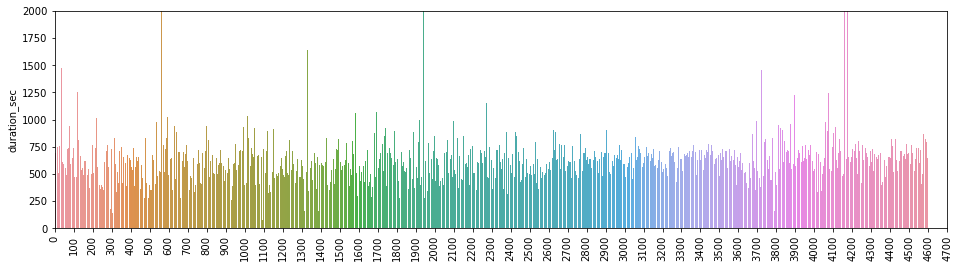

In [56]:
# Barplot of average duration values for each of the 4606 bikes with a unique bike_id and w/ y-axis limited to 2000 sec
# REM: Barplot treats each x value as a Nominal value, thus, it DOES NOT maintain any gaps in numeric bike_id values;
#      however, a notable difference in average duration across the individual bikes should likely still be visible.
xticks = list(np.arange(0, 4701, 100))

plt.figure(figsize=[16, 4])

sb.barplot(bike_id_avg_duration.index.values, bike_id_avg_duration)

plt.xticks(xticks, xticks, rotation=90)    # REM: (locations, labels).
plt.ylim(0, 2000);

# NOTE: Overplotting may influence the precise peak and valley appearance across this plot, but a slight increase
#       in average bike ride duration appears to be present for the higher bike_id bikes.

In [57]:
# For comparison to the preceding plot, which included all 4606 bikes, look at average duration for only bikes with 
# bike_id values evenly divisible by 4 of the average duration Pandas Series.
fourth_bike_id_avg_duration = bike_id_avg_duration[(bike_id_avg_duration.index.values % 4 == 0)]

fourth_bike_id_avg_duration

bike_id
12       646.590909
24       453.625000
40       462.111111
48       682.357143
52       755.875000
           ...     
6624     796.625000
6628     540.656250
6632    1580.615385
6636     759.800000
6644     601.777778
Name: duration_sec, Length: 1145, dtype: float64

C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


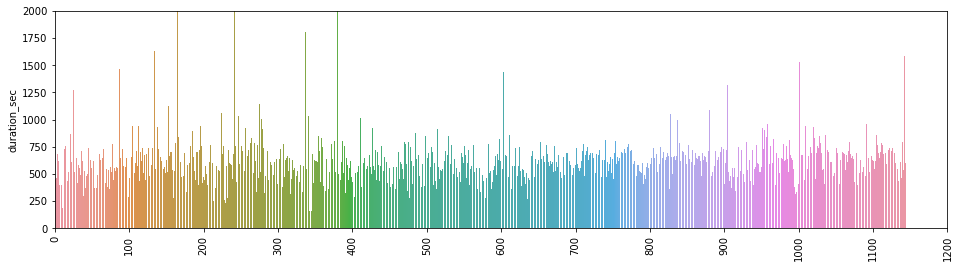

In [58]:
# Plotting the average bike ride duration(sec) for bikes with bike_ids evenly divisible by 4 and w/ y-axis limited to 2000 sec.
xticks = list(np.arange(0, 1201, 100))

plt.figure(figsize=[16, 4])

sb.barplot(fourth_bike_id_avg_duration.index.values, fourth_bike_id_avg_duration)

plt.xticks(xticks, xticks, rotation=90)    # REM: (locations, labels).
plt.ylim(0, 2000);

# NOTE: While overplotting may still be influencing the precise peak and valley appearance across this plot, the general
#       impression of slightly increased average ride duration for the higher bike_id bikes remains.

In [59]:
# Alternatively and more appropriately, look at plt.errorbar() line plot (w/ or w/o error bars) of mean duration 
# for bikes within specified bins of bike_id values.
bin_size = 50
bin_edges = np.arange(10, 6700, bin_size)
# print(bin_edges)    # Just checking.

bin_centers = bin_edges[0:-1] + (0.5 * bin_size)    # REM: From first inclusive, [ : ,  to last exclusive, :-1],
            # 'bin_edges' values and adding half the bin_size to each of the bin_edge values except the last one.
# print(bin_centers)    # Just checking.

bike_id_binned = pd.cut(gobike_clean['bike_id'], bin_edges, include_lowest=True)
print(bike_id_binned)

# NOTE: The 'gobike_clean' DataFrame rows with indexes of 4 through 7 did have bike_id values within the bins indicated below.

4         (4860.0, 4910.0]
5         (5160.0, 5210.0]
6         (3760.0, 3810.0]
7         (6310.0, 6360.0]
8         (6510.0, 6560.0]
                ...       
183407    (4810.0, 4860.0]
183408    (4910.0, 4960.0]
183409    (3810.0, 3860.0]
183410    (5060.0, 5110.0]
183411    (1010.0, 1060.0]
Name: bike_id, Length: 174503, dtype: category
Categories (133, interval[float64]): [(9.999, 60.0] < (60.0, 110.0] < (110.0, 160.0] < (160.0, 210.0] ... (6460.0, 6510.0] < (6510.0, 6560.0] < (6560.0, 6610.0] < (6610.0, 6660.0]]


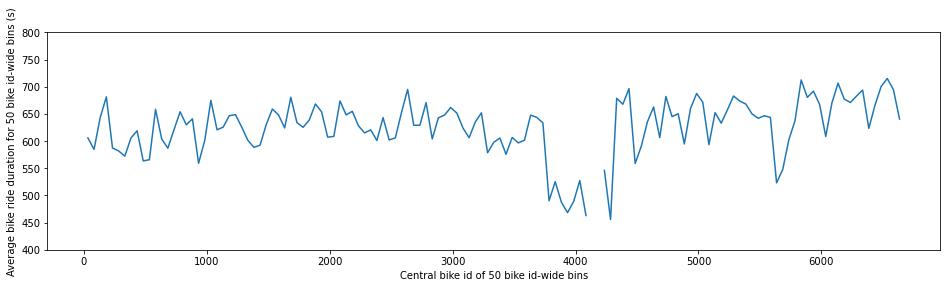

In [60]:
# Using the 50 bike id-wide data bins to calculate the bike ride duration mean for each bin and plot these means
# using plt.errorbar().
bikeid_bins_duration_means = gobike_clean['duration_sec'].groupby(bike_id_binned).mean()
# print(bikeid_bins_duration_means)     # Just checking; YES, 133 values that appear to be reasonable duration averages.

bikeid_bins_duration_stdevs = gobike_clean['duration_sec'].groupby(bike_id_binned).std()    
# print(bikeid_bins_duration_stdevs)    # These errors might be distractingly large.  YES, very large as anticipated.

plt.figure(figsize=[16, 4])
plt.errorbar(x=bin_centers, y=bikeid_bins_duration_means)
plt.xlabel("Central bike id of 50 bike id-wide bins")
plt.ylabel("Average bike ride duration for 50 bike id-wide bins (s)")
plt.ylim(400, 800);

In [61]:
# Going back to my working DataFrame and checking the overall average bike ride durations for 
# bikes with low bike_ids (< 4070) compared to bikes with high bike_ids (> 4313).
gobike_clean.query('bike_id < 4070')['duration_sec'].mean(), gobike_clean.query('bike_id > 4313')['duration_sec'].mean()

# NOTE:  NOT MUCH OF AN OVERALL RIDE DURATION DIFFERENCE FOR THE LOW bike_id BIKES VS. THE HIGH bike_id BIKES.

(614.2613766244762, 658.5769300421243)

In [62]:
# Ride duration for only the group of bikes with the highest bike_ids (i.e., > 5800); might these include the "Plus" ebikes?
gobike_clean.query('bike_id > 5800')['duration_sec'].mean()

683.447989957084

**OBSERVATIONS:** Although there possibly is a slight increase in bike ride duration for the highest bike_id group (bike_id > 5800), it is probably not worth pursuing further without being able to distinguish which bikes are "Plus" ebikes relative to other potential confounding factors.

#### 5. Duration vs. rider age (rider_age)

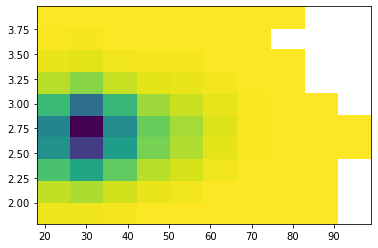

In [63]:
# With the large number of data points, this time I will use a 2D Heatmap rather than a scatterplot with
# sampling and transparency (alpha=0.1), but still plot log10_duration data to improve the y-axis spread of the data.
plt.hist2d(data=gobike_clean, x='rider_age', y='log10_duration', cmap='viridis_r', cmin=0.5);

# NOTE: Specify "finer" grid bins, and add axis labels and colorbar; see next Code Cell.

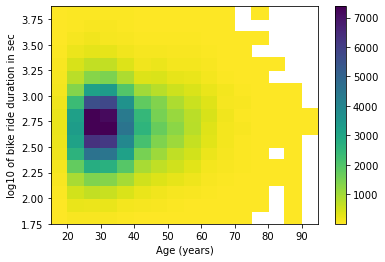

In [64]:
# 2D Heatmap with smaller specified x and y bin sizes.
x_bins = np.arange(15, 100, 5)
y_bins = np.arange(1.75, 4.0, 0.125)

plt.hist2d(data=gobike_clean, x='rider_age', y='log10_duration', cmap='viridis_r', cmin=0.5, bins=[x_bins, y_bins])
plt.colorbar()
plt.xlabel('Age (years)')
plt.ylabel('log10 of bike ride duration in sec');

**OBSERVATIONS:**
- Compared to the above scatterplot, this heatmap more clearly shows that the maximum number of bike rides are taken by those in the 25 to 35 y/o range, and interestingly, the most common bike ride duration is around 10^2.75 sec (i.e., 562 sec; 9.37 min) across all ages out to about 80 y/o.<br><br>
- With respect to longer duration bike rides, while a somewhat higher absolute number of longer duration bike rides are taken by 25 to 30 y/o riders, proportionally there is no obvious age group that is consistently taking longer bike rides.

#### 6. Duration vs. member user type (user_type)

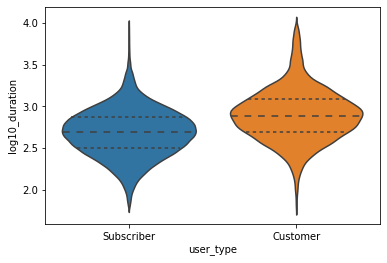

In [65]:
# Taking a closer look at the violinplot of log10_duration vs. user_type.
sb.violinplot(data=gobike_clean, x='user_type', y='log10_duration', inner='quartile');

# REM: y-axis is log10_duration, so linear difference is greater than it appears.  See next Code Cell.

Average "Subscriber" bike ride duration (sec):  604.3170471004181
Average "Customer" bike ride duration (sec):  1052.1643894107601


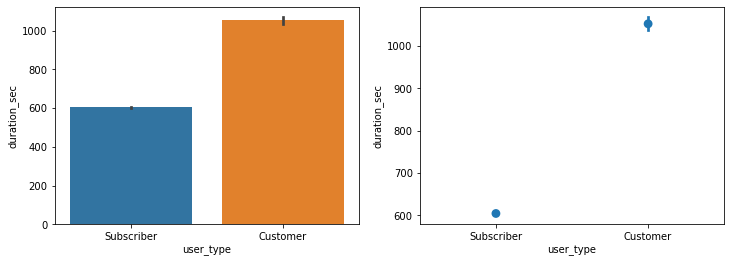

In [66]:
# Looking at AVERAGE duration_sec values for "Subscriber" and "Customer" user types.
avg_subscrib_duration = gobike_clean.query('user_type == "Subscriber"').duration_sec.mean()
avg_customer_duration = gobike_clean.query('user_type == "Customer"').duration_sec.mean()
print('Average "Subscriber" bike ride duration (sec): ', avg_subscrib_duration)
print('Average "Customer" bike ride duration (sec): ', avg_customer_duration)

# Average duration vs. user_type as another comparison using sb.barplot() 
# or sb.pointplot() to automatically average +/- error.
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
sb.barplot(data=gobike_clean, x='user_type', y='duration_sec')    # What type of error w/o ci='sd'?!  (see NOTE just below.)

plt.subplot(1, 2, 2)
sb.pointplot(data=gobike_clean, x='user_type', y='duration_sec', linestyles='');    # What type of error w/0 ci='sd'?!

# NOTE:  Presumably 'sd' (std. dev.) reflects the spread of the individual duration_sec values.
#        In contrast, WITHOUT ci='sd', my impression is that the much smaller std. error of the means 
#        (i.e., "sample" std dev / sqrt of n  , with sample size, n, quite large in this case) is used.

**OBSERVATION:** Substantially longer median and mean bike ride duration for "Customer" riders.

**7. User_type (bike ride counts) vs. start_time_hr and vs. start_time_dotw**

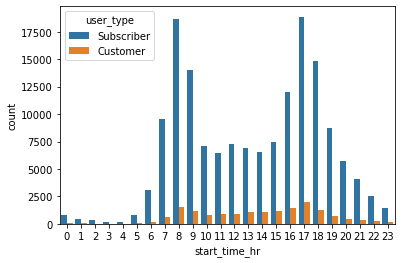

In [67]:
# Look more closely at specific counts (or perhaps proportions) for user_type across start_time_hr  
# and  user_type across start_time_dotw compared to above violinplots. (my "Clustered Bar Chart using sb.countplot()" notes)

# Absolute bike ride counts for user_type across start_time_hr.
sb.countplot(data=gobike_clean, x='start_time_hr', hue='user_type');

C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


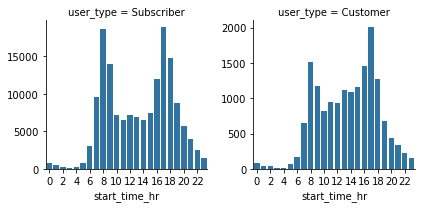

In [68]:
# Replot absolute bike ride counts using separate plots for "Subscriber" and "Customer" user_type 
# across start_time_hr because of the large difference in absolute counts for "Subscriber" and "Customer" riders.
fg = sb.FacetGrid(data=gobike_clean, col='user_type', sharey=False)
fg.map(sb.countplot, 'start_time_hr')
xticks = np.arange(0, 23, 2)
plt.xticks(xticks, xticks);

C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


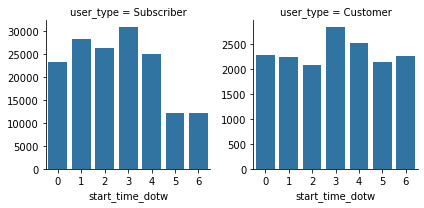

In [69]:
# Absolute bike ride counts for "Subscriber" and "Customer" user_type across start_time_dotw.
fg = sb.FacetGrid(data=gobike_clean, col='user_type', sharey=False)
fg.map(sb.countplot, 'start_time_dotw');

**OBSERVATIONS:**
- Relatively more "Customer" bike rides from about the 10 am to 5 pm hour compared to "Subscribers".<br><br>
- More consistent number of "Customer" bike rides across all seven days of the week compared to notably fewer bike rides for "Subscribers" on Sat(5) and Sun(6).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  My feature of interest, bike ride duration, was most noticeably influenced by starting hour, starting day of the week, and user type, with additional interesting relationships to the linear distance between start and end station.  In contrast, I did not detect a particularly notable increase in bike ride duration for the higher bike_id bikes (perhaps a modest increase for bikes with ids >5800), nor, interestingly, was there a notable difference in the most common bike ride duration, about 560 sec, across most of the age range (i.e., 18 to ~80 y/o).<br>
>  More specifically, a majority of the hours between the traditional workday starting hour (8 am) and ending hour (5 pm) showed both elevated median and mean bike ride duration. Another bike ride duration peak might also occur at about the 2 am hour. A similar elevation in median and mean bike ride duration occurs on the weekend days of the week, i.e., Saturday and Sunday. Moreover, the most pronounced elevation in median and mean bike ride duration occurred with "Customer" riders compared to "Subscriber" riders. The interaction(s) between these three features will be explored further in the following Multivariate Exploration section.<br>
>  Bike ride duration relative to the linear distance between start and end station appeared to fall into two distinct groupings. One grouping was the nonzero-distance **"linear cluster"**, where increasing distance between the start and end station linearly correlated with increasing duration as expected (i.e., it takes a longer time to ride a longer distance). The other grouping includes the zero- or short-linear distance bike rides falling to the left of and above the prominent linear cluster. I suspect the majority of each of these two groupings reflect "purposeful" bike rides (e.g., to work or to shop) and "recreational" bike rides, respectively, and this concept will be explored further in the following Multivariate Exploration section.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  From my above "Overview of Bivariate Relationships" section, the `start_time_hr` vs. `start_time_dotw` (day-of-the-week) plot suggested that relatively fewer bike rides occur at the 2 and 4 am hour on Mon. through Thu. and relatively more bike rides occur at 0 (midnight to 1 am) and 1 am on Fri. through Sun.<br>
>  Also from the above Overview section and `user_type` plots, a greater proportion of "Customer" riders bike within the peak "work commute" times of 10 am (hour 10) to 5 pm (hour 17), and a more consistent number of "Customer" riders bike on each of the seven days of the week compared to "Subscriber" riders, who notably favor "work week" days (Mon. through Fri.).

<a id='Multivariate'></a>
## V. Multivariate Exploration


  **Remember:** Faceting (possibly by both columns and rows), Color, Shape, and Size.  (my "DataVisualization2021_06_08.docx, Lesson 5: Multivariate..." section notes).

#### Reconsidering my features of interest from above analyses with respect to common and longer duration bike rides:
Duration vs. ...
1. start_time_hr; Most apparent increase at hours 11 to 15.
2. start_time_dotw; Most apparent increase on day 5 (Sat) and 6 (Sun).
3. lin_distance; (a) a nonzero-distance _"purposeful" linear cluster_ (from which one could determine an "estimated duration" from an appropriate regression line and which generally shows a typical upper linear distance limit of about 8 km) and (b) a _"recreational"_ grouping, which includes the zero-lin_distance rides that are about 2% of the total bike rides. 
4. "Low-bike_id" (<4070) and "high-bike_id" (>4313); Slight increase in average bike ride duration for the high-bike_id bikes, but no other interesting correlations with bike_id, so DROP THIS FEATURE FROM FURTHER ANALYSIS (although multivariate analysis might uncover something).
5. rider_age; While it is interesting that the most common bike ride duration is generally the same (around 560 sec) across most ages, this suggests that one would have to strive to increase the NUMBER of rides by individuals outside the 25 to 35 y/o range rather than being able to identify what might contribute to LONGER DURATION bike rides to increase overall bike ride time. So, this argues for dropping this feature from further analysis; however, see my "Thinking" just below.
6. user_type; Notable increase in bike ride duration among the less numerous "Customer" riders.<br>

**Thinking about "purposeful/work" riders compared to "recreational" riders with respect to longer duration bike rides:**
Ideally, one would have data specifically indicating which riders are "purposeful/work" riders (presumably w/ some recreational riding) and which are more exclusively "recreational" riders, but no such data is available within this dataset. Thus, thinking about potential surrogate markers, one might suspect that purposeful/worker riders would be more closely associated with:<br>
 (a1) traditional workday start and end times (~8 am and ~5 pm) and (a2) traditional work days (Mon. - Fri.),<br> 
 (b) the "Subscriber" user_type,<br> 
 (c) "working age" bike riders (roughly 23 to 45ish), and<br>
 (d) the nonzero-distance "linear cluster" (i.e., directly biking to another location).<br> 
Conversely, recreational riders would likely be more closely associated with the opposites of (a1) to (d). Therefore, the multivariate analyses below will consider some of the potential interactions between these factors relative to bike ride duration.

**1. Duration (numeric) vs. start_time_hr (catergoric/discrete numeric) vs. start_time_dotw (catergoric/discrete numeric) vs. user_type (categoric)**

In [70]:
# Duration (Numeric) vs. start_time_hr (Categoric in nature; discrete numeric) 
# vs. start_time_dotw (Categoric in nature; discrete numeric).

# Considering (A) Categoric-by-Categoric grid w/ Sequential Color for (Average) Numeric duration (but this would NOT
# easily include "error" estimations, or even just bike ride counts, as grid  annotations?!)  OR
# (B) Faceting across the seven days of start_time_dotw for (Average) Numeric duration-by-start_time_hr.

# First, take a look at means of duration_sec for data grouped by dotw and hr. 
day_hr_avg_duration = gobike_clean.groupby(['start_time_dotw', 'start_time_hr'])['duration_sec'].mean()
print(day_hr_avg_duration)

start_time_dotw  start_time_hr
0                0                745.969072
                 1                660.209302
                 2                843.575000
                 3                409.947368
                 4                717.100000
                                     ...    
6                19               626.697211
                 20               603.664875
                 21               624.121413
                 22               518.191336
                 23               560.980132
Name: duration_sec, Length: 168, dtype: float64


C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


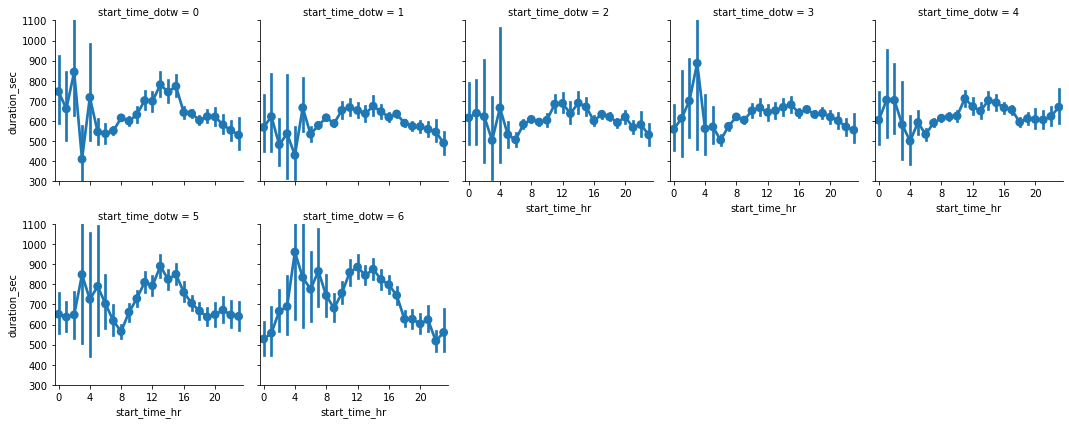

In [71]:
# FacetGrid across 'start_time_dotw' and pointplot of duration_sec(y) vs. start_time_hr(x).
fg = sb.FacetGrid(data=gobike_clean, col='start_time_dotw', col_wrap=5)

fg.map(sb.pointplot, 'start_time_hr', 'duration_sec')
plt.ylim(300, 1100)
x_ticks = [0, 4, 8, 12, 16, 20]
plt.xticks(x_ticks, x_ticks);    # REM: plt.xticks(locations, labels).

C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


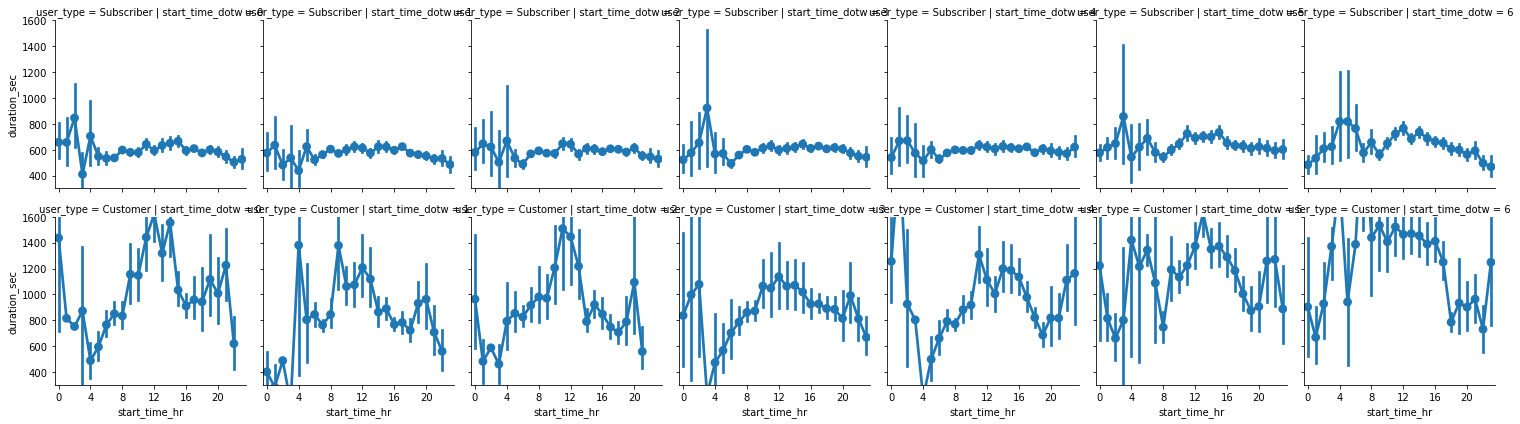

In [72]:
# FacetGrid across 'start_time_dotw' and pointplot of duration_sec(y) vs. start_time_hr(x), but now with  
# row='user_type'  parameter and without  col_wrap=  parameter.
fg = sb.FacetGrid(data=gobike_clean, col='start_time_dotw', row='user_type')

fg.map(sb.pointplot, 'start_time_hr', 'duration_sec')
plt.ylim(300, 1600)
x_ticks = [0, 4, 8, 12, 16, 20]
plt.xticks(x_ticks, x_ticks);    # REM: plt.xticks(locations, labels).

C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Douglas\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


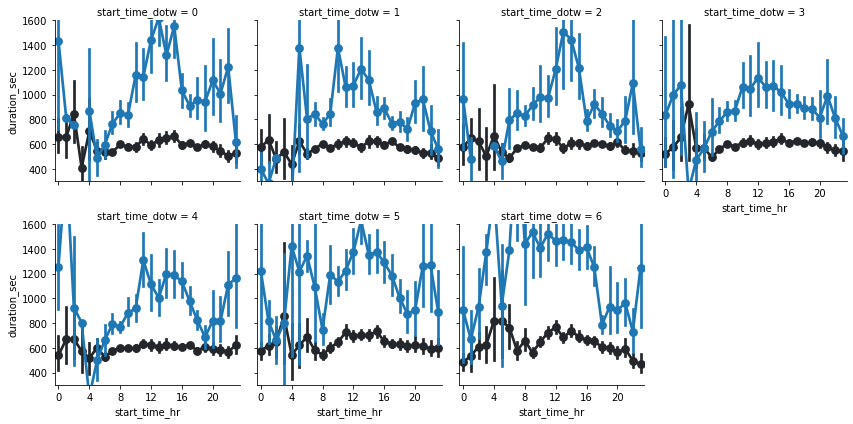

In [73]:
# FacetGrid across 'start_time_dotw' and pointplot of duration_sec(y) vs. start_time_hr(x), but now using 
# hue='user_type'  parameter and with  col_wrap=4  parameter.
fg = sb.FacetGrid(data=gobike_clean, col='start_time_dotw', col_wrap=4)

fg.map(sb.pointplot, 'start_time_hr', 'duration_sec', 'user_type')
plt.ylim(300, 1600)
x_ticks = [0, 4, 8, 12, 16, 20]
plt.xticks(x_ticks, x_ticks);    # REM: plt.xticks(locations, labels).

# NOTE: Interesting that the mid-day rides by the Subscribers also were of about the same average duration
#       during the week days (back-and-forth from home and work across the day hours, perhaps).

**OBSERVATIONS:**
- For "Subscribers", the average bike ride durations are remarkably consistent with relatively small ride duration variability from about 5 am to midnight(hour 23) on Monday(0) through Friday(4), with a slight increase in ride durations during the midday hours on Saturday(5) and Sunday(6).<br><br>
- For "Customers", average bike ride durations and associated variability are generally greater than those of Subscribers, with much of the previously noted "midday" peak in duration being attributable to Customers.<br><br>
- In general, some increased average duration(s) in the early morning (hours 0 to 6), except on Tuesday(1) and Wednesday(2), but with a higher degree of variability in bike ride durations during these hours.<br>

**2. Duration (numeric) vs. lin_distance (numeric) vs. user_type (categoric)**

C:\Users\Douglas\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Douglas\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


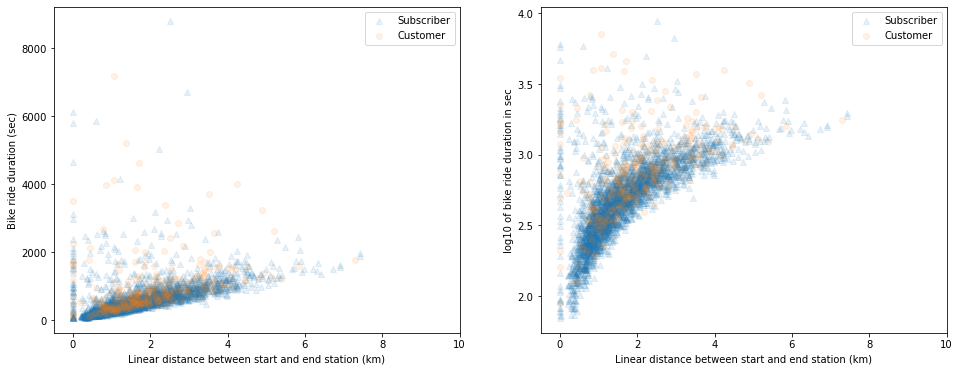

In [74]:
# Scatter plots of a sample of the gobike_clean dataset of duration or log10 duration vs. linear distance, as further above, 
# but now with different color for user_type (Customer, Subscriber) to see if a greater proportion of "Customer" are
# seen to the left and upper-left of the linear grouping of non-zero bike rides (REM: 8 Subscribers for every 1 Customer).

# Neither hue='user_type' nor c='user_type' worked as a direct additional parameter of plt.scatter.

# See my DataVisualization2021_06_08.docx, Lesson 5: Multivariate..., Section 2 & 3 !!!
# Can either (A) use a 'for' Loop for each different marker and color with plt.scatter() or sb.regplot
# or (B) use FacetGrid and its  hue=  parameter.

user_marker = [['Subscriber', '^'],
               ['Customer', 'o']]

plt.figure(figsize=[16, 6])

sample_data = gobike_clean.sample(int(0.02*gobike_clean.shape[0]))    # 2% of full dataset.

for cat, marker in user_marker:
    plt.subplot(1,2,1)
    plot_data = sample_data.query('user_type == @cat')
    plt.scatter(data=plot_data, x='lin_distance', y='duration_sec', marker=marker, alpha=0.1)
    plt.xlim(-0.5, 10)
    plt.ylabel('Bike ride duration (sec)')
    plt.xlabel('Linear distance between start and end station (km)')
    plt.legend([user_marker[0][0], user_marker[1][0]])

for cat, marker in user_marker:
    plt.subplot(1,2,2)
    plot_data = sample_data.query('user_type == @cat')
    plt.scatter(data=plot_data, x='lin_distance', y='log10_duration', marker=marker, alpha=0.1)
    plt.xlim(-0.5, 10)
    plt.ylabel('log10 of bike ride duration in sec')
    plt.xlabel('Linear distance between start and end station (km)')
    plt.legend([user_marker[0][0], user_marker[1][0]]);
    
# NOTE: Perhaps an increased proportion of "Customer" bike rides in the left and upper-left, 
#       but a bit tricky to tell given the 8 times greater number of "subscriber" data points?!

C:\Users\Douglas\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\Douglas\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


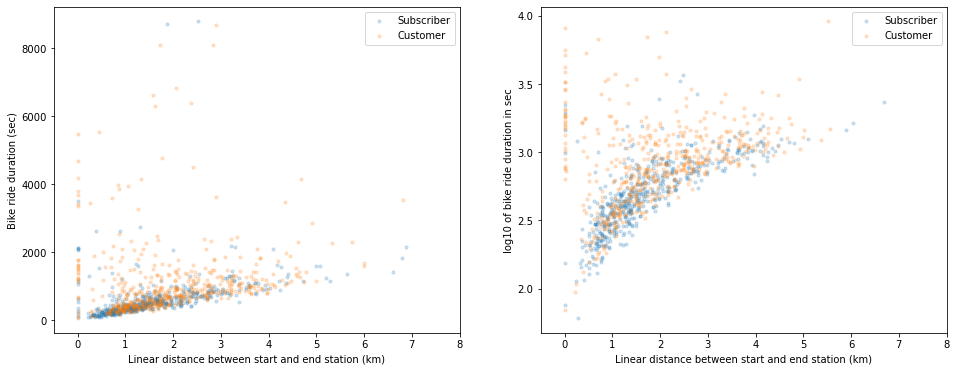

In [75]:
# Like previous Code Cell, but now with a sampling of an equivalent number of "Subscriber" and "Customer" data points
# and with the markers of the same shape, a bit less transparency, and smaller size.
user_marker = [['Subscriber', 'o'],
               ['Customer', 'o']]

plt.figure(figsize=[16, 6])

# sample_data = gobike_clean.sample(int(0.02*gobike_clean.shape[0]))    # 2% of full dataset.
sample_size = 500

for cat, marker in user_marker:
    plt.subplot(1,2,1)
    plot_data = gobike_clean.query('user_type == @cat')    # Changed from 'sample_data' to 'gobike_clean'.
    plot_data = plot_data.sample(sample_size)              # Added for equivalent plotted sample sizes.
    plt.scatter(data=plot_data, x='lin_distance', y='duration_sec', marker=marker, alpha=0.2, s=10)
    plt.xlim(-0.5, 8)                                      # Increased alpha; decreased size(s) and xlim.
    plt.ylabel('Bike ride duration (sec)')
    plt.xlabel('Linear distance between start and end station (km)')
    plt.legend([user_marker[0][0], user_marker[1][0]])

for cat, marker in user_marker:
    plt.subplot(1,2,2)
    plot_data = gobike_clean.query('user_type == @cat')    # Changed from 'sample_data' to 'gobike_clean'.
    plot_data = plot_data.sample(sample_size)              # Added for equivalent plotted sample sizes.
    plt.scatter(data=plot_data, x='lin_distance', y='log10_duration', marker=marker, alpha=0.2, s=10)
    plt.xlim(-0.5, 8)                                      # Increased alpha; decreased size(s) and xlim.
    plt.ylabel('log10 of bike ride duration in sec')
    plt.xlabel('Linear distance between start and end station (km)')
    plt.legend([user_marker[0][0], user_marker[1][0]]);

# NOTE: The 'duration_sec' sampled data is NOT EXACTLY THE SAME AS the 'log10_duration' data.

**OBSERVATIONS:** While there is extensive overlap between the Subscriber and Customer data, a greater number of the sampled Customer data points do appear associated with a higher bike ride duration, particularly for the rides having zero or short(<4 km) linear distance between the start and end station.

**3. Duration (numeric) vs. lin_distance (numeric) vs. Average rider age (numeric)**

In [76]:
# Checking current values in 'duration_sec' and 'lin_distance' columns for specifying x and y bin sizes in preparation
# for 2D Heatmap of duration_sec vs. lin_distance vs. sequential colored (avg) rider_age to see if 
# relatively young(min = 18 y/o) and/or older, potentially non-working riders tend to take longer duration rides.

print(gobike_clean.info())
gobike_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174503 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174503 non-null  int64         
 1   start_time               174503 non-null  datetime64[ns]
 2   end_time                 174503 non-null  datetime64[ns]
 3   start_station_id         174503 non-null  float64       
 4   start_station_name       174503 non-null  object        
 5   start_station_latitude   174503 non-null  float64       
 6   start_station_longitude  174503 non-null  float64       
 7   end_station_id           174503 non-null  float64       
 8   end_station_name         174503 non-null  object        
 9   end_station_latitude     174503 non-null  float64       
 10  end_station_longitude    174503 non-null  float64       
 11  bike_id                  174503 non-null  int64         
 12  user_type       

duration_sec  start_station_id  start_station_latitude  \
count  174503.000000     174503.000000           174503.000000   
mean      646.390876        138.997748               37.771187   
std       585.911743        111.625920                0.100467   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       509.000000        104.000000               37.780760   
75%       786.000000        239.000000               37.797320   
max      9597.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174503.000000   174503.000000         174503.000000   
mean               -122.351711      136.592804             37.771382   
std                   0.117796      111.308211              0.100364   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      238.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  \
count          174503.000000  174503.000000      174503.000000   
mean             -122.351290    4482.485430        1984.838295   
std                 0.117354    1659.185745           9.975167   
min              -122.453704      11.000000        1920.000000   
25%              -122.411647    3799.000000        1980.000000   
50%              -122.397437    4960.000000        1987.000000   
75%              -122.286533    5505.000000        1992.000000   
max              -121.874119    6645.000000        2001.000000   

       log10_duration   lin_distance      rider_age  start_time_hr  \
count   174503.000000  174503.000000  174503.000000  174503.000000   
mean         2.704298       1.690074      34.161705      13.456892   
std          0.295612       1.084325       9.975167       4.734168   
min          1.785330       0.000000      18.000000       0.000000   
25%          2.509203       0.910955      27.000000       9.000000   
50%          2.706718       1.429829      32.000000      14.000000   
75%          2.895423       2.224010      39.000000      17.000000   
max          3.982135      15.673955      99.000000      23.000000   

       start_time_dotw  
count    174503.000000  
mean          2.618958  
std           1.807837  
min           0.000000  
25%           1.000000  
50%           3.000000  
75%           4.000000  
max           6.000000

In [77]:
# 2D Heatmap of duration_sec vs. lin_distance vs. sequential colored (avg) rider_age to see if 
# relatively young(min = 18 y/o) and/or older (potentially non-working) riders tend to take longer duration rides.

# Possibly see my "Encodings_Practice.ipynb" and/or "Multivariate_Exploration.ipynb" Jupyter Notebooks.

# Specific Numeric vs. Numeric w/ Color-encoded Numeric Mean, "DataVisualization2021_06_08.docx", Lesson 5: Multivariate...,
# Section (6), example using plt.hist2d()  and  weights=  parameter.


# Initial pd.cut() with specified x and y bins for duration_sec vs. start_time_hr and mean of the ages w/in each grid bin.
x_bins = [0.0, 0.1, 0.5] + list(np.arange(1.0, 16.5, 0.5))
print(x_bins, '\n')
y_bins = np.arange(0.0, 10005, 250)
print(y_bins, '\n')

# Identify the 'lin_distance'(x) bin and the 'duration_sec'(y) bin that each data point is in:
# REM: For pd.cut() of scalar (single) values, "left" bin values are exclusive (add 'include_lowest=True') 
# and "right" bin values are inclusive; labels=False to default to numeric  AND  .astype(int)
# to make later indexing easier.
lin_dist_bins = pd.cut(gobike_clean.lin_distance, x_bins, include_lowest=True, labels=False).astype(int)
print(lin_dist_bins, '\n')   # For the given DataFrame row/index, the zero-indexed bin number appears to be returned.
                            # NOTE: lin_distance for first five are 2.409, 3.332, 2.028, 4.532, 4.532;  Things look correct!!

duration_bins = pd.cut(gobike_clean.duration_sec, y_bins, include_lowest=True, labels=False).astype(int)
print(duration_bins, '\n')   # NOTE: duration_sec for first five are 1585, 1793, 1147, 1615, 1570;  Things look correct!!

# No change (i.e., no additional columns) in 'gobike_clean', correct?!  CORRECT, Still 21 columns.
# print(gobike_clean.head(), '\n')

[0.0, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0] 

[    0.   250.   500.   750.  1000.  1250.  1500.  1750.  2000.  2250.
  2500.  2750.  3000.  3250.  3500.  3750.  4000.  4250.  4500.  4750.
  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.
  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750.
 10000.] 

4          5
5          7
6          5
7         10
8         10
          ..
183407     3
183408     3
183409     1
183410     2
183411     2
Name: lin_distance, Length: 174503, dtype: int32 

4         6
5         7
6         4
7         6
8         6
         ..
183407    1
183408    1
183409    0
183410    0
183411    1
Name: duration_sec, Length: 174503, dtype: int32 



In [78]:
# Number of points in each grid bin.

n_points = gobike_clean.groupby([lin_dist_bins, duration_bins])   # This apparently matches the two Series' numeric 
    # indexes (itc, now starting at '4') with that of the respective 'gobike_clean' DataFrame row index and
    # forms a temporary ("generic"?) "grouped" DataFrame?!

print(n_points, '\n')    # NOTE: Just outputs "<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001C15CD951C8>".

n_points = n_points.size()    # These 'values' are the number of points in each grid bin.
print(n_points, '\n')         # NOTE: Length of 464 lin_dist-by-duration grid bins with >= 1 data point;  
                              # (33)(39) = 1287 max grid bins.

n_points.sum()   # Returns the sum of the values, which should equal the total # of 'gobike_clean' rows, i.e., 174503 (CHECK)

# NOTE: Notice some missing 'lin_distance' index values; i.e., 26 instead of the full 33 (0 to 32 indexes) with
#       respect to later ERROR!


lin_distance  duration_sec
0             0               814
              1               353
              2               327
              3               292
              4               226
                             ... 
25            7                 1
28            8                 1
              17                1
29            12                1
32            8                 1
Length: 464, dtype: int64 



174503

**NOTE TO REVIEWER: Many of the following Code Cells involve troubleshooting steps to properly plot the 2D Heatmap of duration_sec vs. lin_distance vs. sequential colored (avg) rider_age data and are retained for my own future reference.**

In [79]:
# Now, convert the MultiIndex 'n_points' Series to the appropriate 2D array/matrix 
# (correct x and y dimensions wrt 'lin_distance' and 'duration_sec', respectively).

# Convert the MultiIndex 'n_points' Series to its DataFrame form using  .reset_index() .
n_points = n_points.reset_index(name='count')   # NEED TO RETAIN ROWS OR COLUMNS WITH ALL NaNs OR ELSE LATER
                                                # "IndexError: index 32 is out of bounds for axis 0 with size 26"  error.
print(n_points.info())
n_points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   lin_distance  464 non-null    int64
 1   duration_sec  464 non-null    int64
 2   count         464 non-null    int64
dtypes: int64(3)
memory usage: 11.0 KB
None


lin_distance  duration_sec  count
0               0             0    814
1               0             1    353
2               0             2    327
3               0             3    292
4               0             4    226
..            ...           ...    ...
459            25             7      1
460            28             8      1
461            28            17      1
462            29            12      1
463            32             8      1

[464 rows x 3 columns]

In [80]:
# Look for missing 'lin_distance' (i.e., 'lin_dist_bins') values in 'n_points'.  
n_points.lin_distance.unique()

# NOTE:  21, 22, 23, 26, 27, 30, and 31 (7) are missing.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 24, 25, 28, 29, 32], dtype=int64)

In [81]:
# Check for any missing 'duration_sec' (i.e., 'duration_bins') values in 'n_points'.
n_points.duration_sec.unique()

# NOTE:  All 39 (0 - 38) are present, eventhough 34 is nonconsecutively listed here.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       35, 36, 37, 38, 34], dtype=int64)

In [82]:
# Pivot the 'duration_sec' column values to column headers/indexes and retain the 'lin_distance' column values
# as row indexes.
n_points = n_points.pivot(index='lin_distance', columns='duration_sec')

print(type(n_points))

n_points

# NOTE: 26 rows x 39 columns, rather than 33 x 39!  This caused an IndexError further below.

<class 'pandas.core.frame.DataFrame'>


count                                                         \
duration_sec       0        1        2       3       4      5      6      7    
lin_distance                                                                   
0               814.0    353.0    327.0   292.0   226.0  210.0  215.0  197.0   
1              7136.0   1025.0    240.0   154.0   115.0   89.0   80.0   67.0   
2             16206.0  19029.0   1953.0   559.0   276.0  224.0  192.0  175.0   
3              1643.0  27305.0   8197.0  1390.0   505.0  283.0  237.0  160.0   
4                 4.0   9780.0  13722.0  3011.0   760.0  381.0  212.0  169.0   
5                 NaN   1959.0  10883.0  5051.0  1196.0  438.0  228.0  138.0   
6                 NaN    113.0   4467.0  5236.0  1681.0  439.0  204.0  124.0   
7                 NaN      5.0   1247.0  4122.0  2055.0  717.0  217.0  122.0   
8                 NaN      NaN    195.0  2089.0  2096.0  806.0  253.0  114.0   
9                 NaN      NaN     19.0   610.0  1343.0  715.0  268.0  131.0   
10                NaN      NaN      3.0   163.0   538.0  438.0  189.0   96.0   
11                NaN      NaN      NaN    42.0   216.0  276.0  156.0   66.0   
12                NaN      NaN      NaN     4.0    36.0  121.0  107.0   33.0   
13                NaN      NaN      NaN     1.0    34.0   83.0   81.0   43.0   
14                NaN      NaN      NaN     NaN     6.0   51.0   69.0   46.0   
15                NaN      NaN      NaN     NaN     NaN    9.0   18.0   20.0   
16                NaN      NaN      NaN     NaN     NaN    6.0   10.0   10.0   
17                NaN      NaN      NaN     NaN     NaN    NaN    6.0    7.0   
18                NaN      NaN      NaN     NaN     NaN    NaN    1.0    4.0   
19                NaN      NaN      NaN     NaN     NaN    NaN    NaN    3.0   
20                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
24                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
25                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
28                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
29                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
32                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   

                            ...                                               \
duration_sec     8      9   ...   29   30   31   32   33   34   35   36   37   
lin_distance                ...                                                
0             145.0  123.0  ...  7.0  3.0  4.0  4.0  4.0  NaN  2.0  2.0  1.0   
1              45.0   44.0  ...  1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  NaN   
2             139.0   94.0  ...  1.0  NaN  5.0  3.0  7.0  3.0  4.0  3.0  1.0   
3             146.0   98.0  ...  6.0  NaN  NaN  4.0  1.0  NaN  1.0  NaN  1.0   
4             109.0   88.0  ...  1.0  4.0  NaN  5.0  2.0  1.0  1.0  NaN  2.0   
5             105.0   72.0  ...  3.0  7.0  1.0  2.0  1.0  3.0  1.0  1.0  NaN   
6              77.0   56.0  ...  NaN  2.0  2.0  2.0  NaN  2.0  2.0  1.0  NaN   
7              57.0   59.0  ...  1.0  4.0  NaN  1.0  NaN  NaN  2.0  NaN  NaN   
8              57.0   32.0  ...  1.0  1.0  1.0  1.0  2.0  NaN  2.0  NaN  1.0   
9              45.0   41.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
10             40.0   20.0  ...  NaN  NaN  NaN  2.0  4.0  2.0  NaN  NaN  1.0   
11             35.0   18.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12             31.0   19.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
13             21.0    7.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
14             32.0   13.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15             17.0    8.0  ...  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
16             15.0    3.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
17              4.0    5.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18             

In [83]:
# Because of later IndexError, fill out missing numbered rows in the 'n_points' 2D array with NaNs. 
# REM: lin_distance Rows needed = 21, 22, 23, 26, 27, 30, 31

# First, checking the nature of the row 'index' values and the column index values (.columns).
print(n_points.index, '\n')
print(n_points.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 24, 25, 28, 29, 32],
           dtype='int64', name='lin_distance') 

MultiIndex([('count',  0),
            ('count',  1),
            ('count',  2),
            ('count',  3),
            ('count',  4),
            ('count',  5),
            ('count',  6),
            ('count',  7),
            ('count',  8),
            ('count',  9),
            ('count', 10),
            ('count', 11),
            ('count', 12),
            ('count', 13),
            ('count', 14),
            ('count', 15),
            ('count', 16),
            ('count', 17),
            ('count', 18),
            ('count', 19),
            ('count', 20),
            ('count', 21),
            ('count', 22),
            ('count', 23),
            ('count', 24),
            ('count', 25),
            ('count', 26),
            ('count', 27),
            ('count', 28),
            ('count', 29),
            

In [84]:
# Generate a row of 39 NaNs, which is the "width" of 'n_points' DataFrame.

# nan_array = np.empty(39, dtype=np.float64)   # NOTE: This generated a "column" shape rather than the desired "row" in shape.

nan_array = np.empty((1, 39), dtype=np.float64)
nan_array.fill(np.nan)
print(nan_array)

row_21 = pd.DataFrame(index=[21], data=nan_array, dtype='float64')    # NO  'columns='  parameter included here (see below).
row_21

# NOTE: This row of NaNs looks good, but without the appropriate  'columns='  parameter argument (see below)
#       the following error occurs when trying to append this row:
#       NotImplementedError: Can only union MultiIndex with MultiIndex or Index of tuples, try mi.to_flat_index().union(other) instead. 

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]]


0   1   2   3   4   5   6   7   8   9   ...  29  30  31  32  33  34  35  \
21 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   

    36  37  38  
21 NaN NaN NaN  

[1 rows x 39 columns]

In [85]:
# Tried to append a single DataFrame indexed-row to n_points DataFrame.

# n_points.append(row_21, ignore_index=False)

     # ERROR;  NotImplementedError: Can only union MultiIndex with MultiIndex or Index of tuples,
     # try mi.to_flat_index().union(other) instead.

In [86]:
# Tried to use  .to_flat_index().union()  instead of  .append().

# n_points.to_flat_index().union(row_21, ignore_index=False)

     # ERROR;  AttributeError: 'DataFrame' object has no attribute 'to_flat_index' .

In [87]:
# Like above, generate a row of 39 NaNs, but also assign the same 'n_points' MultiIndex column indexes to this 
# row of NaNs using the  'columns='  parameter.

nan_array = np.empty((1, 39), dtype=np.float64)
nan_array.fill(np.nan)
print(nan_array)

row_21 = pd.DataFrame(index=[21], columns=n_points.columns, data=nan_array, dtype='float64')   # 'columns=' parameter added!
row_21

# NOTE: Notice the MultiIndex nature of the column indexes of this row of NaNs.

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]]


count                                      ...                  \
duration_sec    0   1   2   3   4   5   6   7   8   9   ...  29  30  31  32   
21             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   

                                      
duration_sec  33  34  35  36  37  38  
21           NaN NaN NaN NaN NaN NaN  

[1 rows x 39 columns]

In [88]:
# Append the preceding row of MultiIndexed columns to 'n_points' DataFrame.
n_points_full = n_points.append(row_21, ignore_index=False)
n_points_full

# WORKED! But I strongly suspect that I need to sort by the below 'duration_sec' n_point.index values
# because of previous "IndexError: index 32 is out of bounds for axis 0 with size 26" (further below).

count                                                         \
duration_sec       0        1        2       3       4      5      6      7    
0               814.0    353.0    327.0   292.0   226.0  210.0  215.0  197.0   
1              7136.0   1025.0    240.0   154.0   115.0   89.0   80.0   67.0   
2             16206.0  19029.0   1953.0   559.0   276.0  224.0  192.0  175.0   
3              1643.0  27305.0   8197.0  1390.0   505.0  283.0  237.0  160.0   
4                 4.0   9780.0  13722.0  3011.0   760.0  381.0  212.0  169.0   
5                 NaN   1959.0  10883.0  5051.0  1196.0  438.0  228.0  138.0   
6                 NaN    113.0   4467.0  5236.0  1681.0  439.0  204.0  124.0   
7                 NaN      5.0   1247.0  4122.0  2055.0  717.0  217.0  122.0   
8                 NaN      NaN    195.0  2089.0  2096.0  806.0  253.0  114.0   
9                 NaN      NaN     19.0   610.0  1343.0  715.0  268.0  131.0   
10                NaN      NaN      3.0   163.0   538.0  438.0  189.0   96.0   
11                NaN      NaN      NaN    42.0   216.0  276.0  156.0   66.0   
12                NaN      NaN      NaN     4.0    36.0  121.0  107.0   33.0   
13                NaN      NaN      NaN     1.0    34.0   83.0   81.0   43.0   
14                NaN      NaN      NaN     NaN     6.0   51.0   69.0   46.0   
15                NaN      NaN      NaN     NaN     NaN    9.0   18.0   20.0   
16                NaN      NaN      NaN     NaN     NaN    6.0   10.0   10.0   
17                NaN      NaN      NaN     NaN     NaN    NaN    6.0    7.0   
18                NaN      NaN      NaN     NaN     NaN    NaN    1.0    4.0   
19                NaN      NaN      NaN     NaN     NaN    NaN    NaN    3.0   
20                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
24                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
25                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
28                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
29                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
32                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
21                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   

                            ...                                               \
duration_sec     8      9   ...   29   30   31   32   33   34   35   36   37   
0             145.0  123.0  ...  7.0  3.0  4.0  4.0  4.0  NaN  2.0  2.0  1.0   
1              45.0   44.0  ...  1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  NaN   
2             139.0   94.0  ...  1.0  NaN  5.0  3.0  7.0  3.0  4.0  3.0  1.0   
3             146.0   98.0  ...  6.0  NaN  NaN  4.0  1.0  NaN  1.0  NaN  1.0   
4             109.0   88.0  ...  1.0  4.0  NaN  5.0  2.0  1.0  1.0  NaN  2.0   
5             105.0   72.0  ...  3.0  7.0  1.0  2.0  1.0  3.0  1.0  1.0  NaN   
6              77.0   56.0  ...  NaN  2.0  2.0  2.0  NaN  2.0  2.0  1.0  NaN   
7              57.0   59.0  ...  1.0  4.0  NaN  1.0  NaN  NaN  2.0  NaN  NaN   
8              57.0   32.0  ...  1.0  1.0  1.0  1.0  2.0  NaN  2.0  NaN  1.0   
9              45.0   41.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
10             40.0   20.0  ...  NaN  NaN  NaN  2.0  4.0  2.0  NaN  NaN  1.0   
11             35.0   18.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12             31.0   19.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
13             21.0    7.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
14             32.0   13.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15             17.0    8.0  ...  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
16             15.0    3.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
17              4.0    5.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18              2.0    1.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
19             

In [89]:
# Generate multiple rows of all NaNs consistent with needed number of rows.
row_indexes_to_add = [22, 23, 26, 27, 30, 31]

nan_matrix = np.empty((len(row_indexes_to_add), 39), dtype=np.float64)
nan_matrix.fill(np.nan)
print(nan_matrix)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]]


In [90]:
# Generate the appropriately indexed rows of all NaNs that also have the correct 'n_points' MultiIndexed columns
# needed for subsequent appending to 'n_points_full'.
rows_to_add = pd.DataFrame(index=row_indexes_to_add, columns=n_points.columns, data=nan_matrix, dtype='float64')
rows_to_add

count                                      ...                  \
duration_sec    0   1   2   3   4   5   6   7   8   9   ...  29  30  31  32   
22             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
23             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
26             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
27             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
30             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
31             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   

                                      
duration_sec  33  34  35  36  37  38  
22           NaN NaN NaN NaN NaN NaN  
23           NaN NaN NaN NaN NaN NaN  
26           NaN NaN NaN NaN NaN NaN  
27           NaN NaN NaN NaN NaN NaN  
30           NaN NaN NaN NaN NaN NaN  
31           NaN NaN NaN NaN NaN NaN  

[6 rows x 39 columns]

In [91]:
# Append the rows with all NaNs to 'n_points_full'.
n_points_full = n_points_full.append(rows_to_add, ignore_index=False)
n_points_full

# WORKED! But I still strongly suspect that I need to sort by the below 'duration_sec' n_point.index values
# because "IndexError: index 32 is out of bounds for axis 0 with size 26" (further below).

count                                                         \
duration_sec       0        1        2       3       4      5      6      7    
0               814.0    353.0    327.0   292.0   226.0  210.0  215.0  197.0   
1              7136.0   1025.0    240.0   154.0   115.0   89.0   80.0   67.0   
2             16206.0  19029.0   1953.0   559.0   276.0  224.0  192.0  175.0   
3              1643.0  27305.0   8197.0  1390.0   505.0  283.0  237.0  160.0   
4                 4.0   9780.0  13722.0  3011.0   760.0  381.0  212.0  169.0   
5                 NaN   1959.0  10883.0  5051.0  1196.0  438.0  228.0  138.0   
6                 NaN    113.0   4467.0  5236.0  1681.0  439.0  204.0  124.0   
7                 NaN      5.0   1247.0  4122.0  2055.0  717.0  217.0  122.0   
8                 NaN      NaN    195.0  2089.0  2096.0  806.0  253.0  114.0   
9                 NaN      NaN     19.0   610.0  1343.0  715.0  268.0  131.0   
10                NaN      NaN      3.0   163.0   538.0  438.0  189.0   96.0   
11                NaN      NaN      NaN    42.0   216.0  276.0  156.0   66.0   
12                NaN      NaN      NaN     4.0    36.0  121.0  107.0   33.0   
13                NaN      NaN      NaN     1.0    34.0   83.0   81.0   43.0   
14                NaN      NaN      NaN     NaN     6.0   51.0   69.0   46.0   
15                NaN      NaN      NaN     NaN     NaN    9.0   18.0   20.0   
16                NaN      NaN      NaN     NaN     NaN    6.0   10.0   10.0   
17                NaN      NaN      NaN     NaN     NaN    NaN    6.0    7.0   
18                NaN      NaN      NaN     NaN     NaN    NaN    1.0    4.0   
19                NaN      NaN      NaN     NaN     NaN    NaN    NaN    3.0   
20                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
24                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
25                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
28                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
29                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
32                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
21                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
22                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
23                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
26                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
27                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
30                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
31                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   

                            ...                                               \
duration_sec     8      9   ...   29   30   31   32   33   34   35   36   37   
0             145.0  123.0  ...  7.0  3.0  4.0  4.0  4.0  NaN  2.0  2.0  1.0   
1              45.0   44.0  ...  1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  NaN   
2             139.0   94.0  ...  1.0  NaN  5.0  3.0  7.0  3.0  4.0  3.0  1.0   
3             146.0   98.0  ...  6.0  NaN  NaN  4.0  1.0  NaN  1.0  NaN  1.0   
4             109.0   88.0  ...  1.0  4.0  NaN  5.0  2.0  1.0  1.0  NaN  2.0   
5             105.0   72.0  ...  3.0  7.0  1.0  2.0  1.0  3.0  1.0  1.0  NaN   
6              77.0   56.0  ...  NaN  2.0  2.0  2.0  NaN  2.0  2.0  1.0  NaN   
7              57.0   59.0  ...  1.0  4.0  NaN  1.0  NaN  NaN  2.0  NaN  NaN   
8              57.0   32.0  ...  1.0  1.0  1.0  1.0  2.0  NaN  2.0  NaN  1.0   
9              45.0   41.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
10             40.0   20.0  ...  NaN  NaN  NaN  2.0  4.0  2.0  NaN  NaN  1.0   
11             35.0   18.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12             31.0   19.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
13             

In [92]:
# SORT BY 'duration_sec' n_point_full.index values to get the grid bin count values in the proper 2D positions
# (as susggested by the "IndexError: index 32 is out of bounds for axis 0 with size 26" error).
n_points_full = n_points_full.sort_index()
n_points_full

count                                                         \
duration_sec       0        1        2       3       4      5      6      7    
0               814.0    353.0    327.0   292.0   226.0  210.0  215.0  197.0   
1              7136.0   1025.0    240.0   154.0   115.0   89.0   80.0   67.0   
2             16206.0  19029.0   1953.0   559.0   276.0  224.0  192.0  175.0   
3              1643.0  27305.0   8197.0  1390.0   505.0  283.0  237.0  160.0   
4                 4.0   9780.0  13722.0  3011.0   760.0  381.0  212.0  169.0   
5                 NaN   1959.0  10883.0  5051.0  1196.0  438.0  228.0  138.0   
6                 NaN    113.0   4467.0  5236.0  1681.0  439.0  204.0  124.0   
7                 NaN      5.0   1247.0  4122.0  2055.0  717.0  217.0  122.0   
8                 NaN      NaN    195.0  2089.0  2096.0  806.0  253.0  114.0   
9                 NaN      NaN     19.0   610.0  1343.0  715.0  268.0  131.0   
10                NaN      NaN      3.0   163.0   538.0  438.0  189.0   96.0   
11                NaN      NaN      NaN    42.0   216.0  276.0  156.0   66.0   
12                NaN      NaN      NaN     4.0    36.0  121.0  107.0   33.0   
13                NaN      NaN      NaN     1.0    34.0   83.0   81.0   43.0   
14                NaN      NaN      NaN     NaN     6.0   51.0   69.0   46.0   
15                NaN      NaN      NaN     NaN     NaN    9.0   18.0   20.0   
16                NaN      NaN      NaN     NaN     NaN    6.0   10.0   10.0   
17                NaN      NaN      NaN     NaN     NaN    NaN    6.0    7.0   
18                NaN      NaN      NaN     NaN     NaN    NaN    1.0    4.0   
19                NaN      NaN      NaN     NaN     NaN    NaN    NaN    3.0   
20                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
21                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
22                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
23                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
24                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
25                NaN      NaN      NaN     NaN     NaN    NaN    NaN    1.0   
26                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
27                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
28                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
29                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
30                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
31                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   
32                NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN   

                            ...                                               \
duration_sec     8      9   ...   29   30   31   32   33   34   35   36   37   
0             145.0  123.0  ...  7.0  3.0  4.0  4.0  4.0  NaN  2.0  2.0  1.0   
1              45.0   44.0  ...  1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  NaN   
2             139.0   94.0  ...  1.0  NaN  5.0  3.0  7.0  3.0  4.0  3.0  1.0   
3             146.0   98.0  ...  6.0  NaN  NaN  4.0  1.0  NaN  1.0  NaN  1.0   
4             109.0   88.0  ...  1.0  4.0  NaN  5.0  2.0  1.0  1.0  NaN  2.0   
5             105.0   72.0  ...  3.0  7.0  1.0  2.0  1.0  3.0  1.0  1.0  NaN   
6              77.0   56.0  ...  NaN  2.0  2.0  2.0  NaN  2.0  2.0  1.0  NaN   
7              57.0   59.0  ...  1.0  4.0  NaN  1.0  NaN  NaN  2.0  NaN  NaN   
8              57.0   32.0  ...  1.0  1.0  1.0  1.0  2.0  NaN  2.0  NaN  1.0   
9              45.0   41.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
10             40.0   20.0  ...  NaN  NaN  NaN  2.0  4.0  2.0  NaN  NaN  1.0   
11             35.0   18.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12             31.0   19.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
13             

In [93]:
# Convert the DataFrame into a 2D array/matrix of the size/count values.
n_points_full = n_points_full.values
n_points_full

array([[8.1400e+02, 3.5300e+02, 3.2700e+02, ..., 2.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.1360e+03, 1.0250e+03, 2.4000e+02, ..., 1.0000e+00,        nan,
               nan],
       [1.6206e+04, 1.9029e+04, 1.9530e+03, ..., 3.0000e+00, 1.0000e+00,
        2.0000e+00],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [94]:
# (From my UDACITY Classroom notes) Now we can get the "weight" for each point using all of the above values 
# by taking the gobike_clean['rider_age'] Series  and  dividing each element by the number of points in each grid bin
# by using the "cut" bin vectors [indexes] for indexing into the correct places.  

rider_ages = gobike_clean['rider_age']
print(rider_ages, '\n')

gridbin_counts = n_points_full[lin_dist_bins, duration_bins]    # NOTE: "IndexError: index 32 is out of bounds for axis 0 with
                                                                # size 26"  ERROR (before creating "full" 33 r x 39 c matrix)!!
print(gridbin_counts)

# NOTE: The 'gobike_clean' DataFrame rows with indexes 4 and 5 were in grid bins (lin_dist_bins, duration_bins) of (5, 6) and
# (7, 7) (see above) and these two grid bins had count values in 'n_points_full' of 228.0 and 122.0, which is
# consistent with the first two 'gridbin_counts' output values below.  So, looks good!

4         45.0
5         60.0
6         36.0
7         30.0
8         31.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: rider_age, Length: 174503, dtype: float64 

[  228.   122.  1196. ...  7136. 16206. 19029.]


In [95]:
# Generate the 'age_weights' argument for the plt.hist2d() 'weights' parameter.
age_weights = rider_ages/gridbin_counts
age_weights

4         0.197368
5         0.491803
6         0.030100
7         0.158730
8         0.164021
            ...   
183407    0.000842
183408    0.001282
183409    0.004064
183410    0.001913
183411    0.001577
Name: rider_age, Length: 174503, dtype: float64

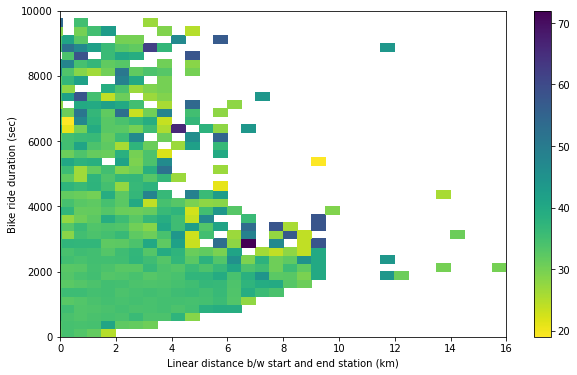

In [96]:
# Plot 2D Heatmap of duration_sec vs. lin_distance vs. sequential colored (avg) rider_age to see if 
# relatively young(min = 18 y/o) and/or older (potentially non-working) riders tend to take longer duration rides.

# Possibly see my "Encodings_Practice.ipynb" and/or "Multivariate_Exploration.ipynb" Jupyter Notebooks.

# Specific Numeric vs. Numeric w/ Color-encoded Numeric Mean, "DataVisualization2021_06_08.docx", Lesson 5: Multivariate...,
# Section (6), example using plt.hist2d()  and  weights=  parameter.

# 2D Heatmap plot.
# x_bins = [0.0, 0.1, 0.5] + list(np.arange(1.0, 10.5, 0.5))   # Just using previous 'x_bins'.
# y_bins = np.arange(0.0, 10000, 250)                          # Just using previous 'y_bins'.
plt.figure(figsize=[10, 6])

plt.hist2d(data=gobike_clean, x='lin_distance', y='duration_sec', cmap='viridis_r', cmin=5, 
           bins=[x_bins, y_bins], weights=age_weights)
           # NOTE: 'cmin' set to 5 to avoid relatively meaningless color differences in sparse data areas of the plot.
plt.colorbar()
plt.xlabel('Linear distance b/w start and end station (km)')
plt.ylabel('Bike ride duration (sec)');

# NOTE: (1) Yes, appears to generally be solid "working" age riders on average along the "linear group".
#       (2) Yes, apparently more of a mix of relatively young or old riders above and to the left of the "linear group".

**OBSERVATIONS:**
- In general, there is a solid presence of "working age" riders on average along the nonzero-distance "linear cluster".<br><br>
- In general, there is a greater mix of relatively young or old riders on average above the nonzero-distance "linear cluster".

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  Bivariate scatterplots suggested elevated bike ride durations during the midday hours and on weekend days (Sat. and Sun.). Furthermore, bivariate violinplots and countplots indicated a proportionally increased number of bike rides for "Customer" riders (compared to "Subscriber" riders) during the midday and on the weekend. Interestingly, the multivariate pointplots of average `duration_sec` vs. `start_time_hour` separated by `user_type` (Subscriber or Customer) and faceted across the days of the week (`start_time_dotw`) showed how the longer duration of "Customer" bike rides combined with their proportionally increased number of bike rides are the major contributor to elevated midday and weekend bike ride durations.<br>
  Returning to the idea that "Subscriber" riders may be more closely associated with purposeful work riders rather than more recreational Customer riders, I attempted to determine whether bike riders among the nonzero-distance linear cluster tend to be Subscribers and/or are of a working age likely to ride a bike. Bivariate user_type-faceted countplots (above) indicated that Subscribers do, indeed, bike more frequently around the traditional peak workday starting hour (8 am) and ending hour (5 pm) and during the weekday days (Mon. through Fri.). Also, a multivariate scatterplot of duration_sec (or log10_duration) vs. lin_distance with marker color distinguishing user_type and using an equivalent number of sampled data points suggests that a greater proportion of Subscribers are among the nonzero-distance linear cluster.  However, there is still substantial overlap with the comparable Customer data within the nonzero-distance linear cluster.  Similarly, a 2D Heatmap of duration_sec vs. lin_distance with sequential coloring based on average rider age is suggestive of nonzero, linear distance grouping riders being of an anticipated working age (on average) that would be likely to ride a bike. Taken together, it does appear that many of the Subscriber bike riders are work commuters whose bike ride durations are primarily associated with the linear distance between their starting and ending station, with a typical maximum commute distance of about 8 km.

### Were there any interesting or surprising interactions between features?

> Nothing more of particular interest than that discussed just above.